___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [305]:
df =pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [306]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [307]:
df.shape

(10000, 14)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [309]:
print('''
Number of Duplicate is   : {}
Number of Null-Values is : {}'''.format(df.duplicated().sum(),df.isna().sum().sum()))


Number of Duplicate is   : 0
Number of Null-Values is : 0


In [310]:
print('Shape Before Drop: ',df.shape)
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
print('Shape After Drop: ',df.shape)

Shape Before Drop:  (10000, 14)
Shape After Drop:  (10000, 11)


### Breaking Down the Object columns 
In this section, we conducted an initial analysis of the dataset to gain insights into its structure and content. We explored various aspects, including the data's dimensions, data types, and initial statistics. Additionally, we visualized key attributes to understand their distributions and relationships. The purpose of this initial analysis is to lay the foundation for more in-depth exploration, feature engineering, and model building. We identified object columns  "Geography," and "Gender" for further investigation, which can provide valuable insights into customer demographics and behaviors

In [311]:
df.select_dtypes(include=['object'])

Geography  Gender
0       France  Female
1        Spain  Female
2       France  Female
3       France  Female
4        Spain  Female
...        ...     ...
9995    France    Male
9996    France    Male
9997    France  Female
9998   Germany    Male
9999    France  Female

[10000 rows x 2 columns]

In [312]:
df.select_dtypes(include=['object']).nunique() 

Geography    3
Gender       2
dtype: int64

In [313]:
fig1 = px.pie(df, names='Gender', title='Gender Distribution')
fig1.show()

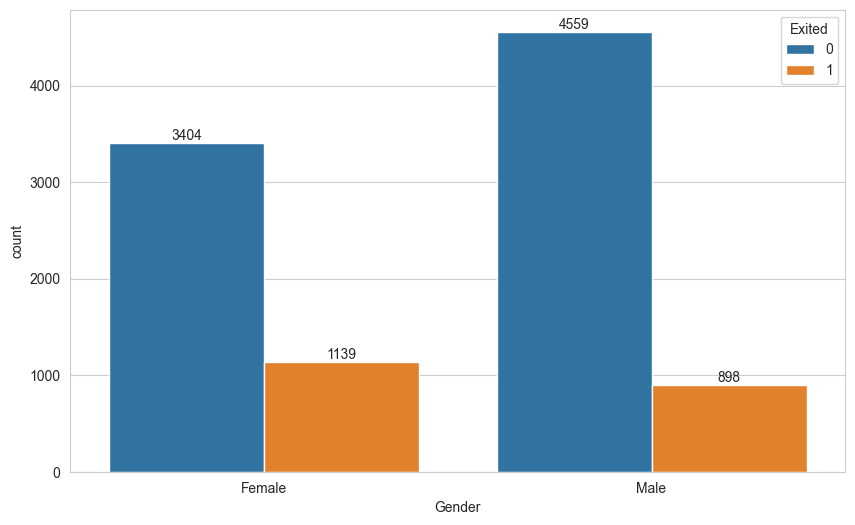

In [314]:
ax=sns.countplot(data= df , x='Gender',hue='Exited')
for i in range(df['Exited'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')
# we can see that the majorty of who left the bank are females 

In [315]:
fig = px.histogram(df, x='Gender', color='Exited', title='Gender with Exited')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

In [316]:

fig3 = px.box(df, x='Gender', y='Age', color='Exited', title='Age Distribution by Gender and Exit Status')
fig3.show()

In [317]:
df.groupby('Gender')['Exited'].value_counts().unstack()

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

In [318]:
fig1 = px.pie(df, names='Geography', title='Geography Distribution')
fig1.show()

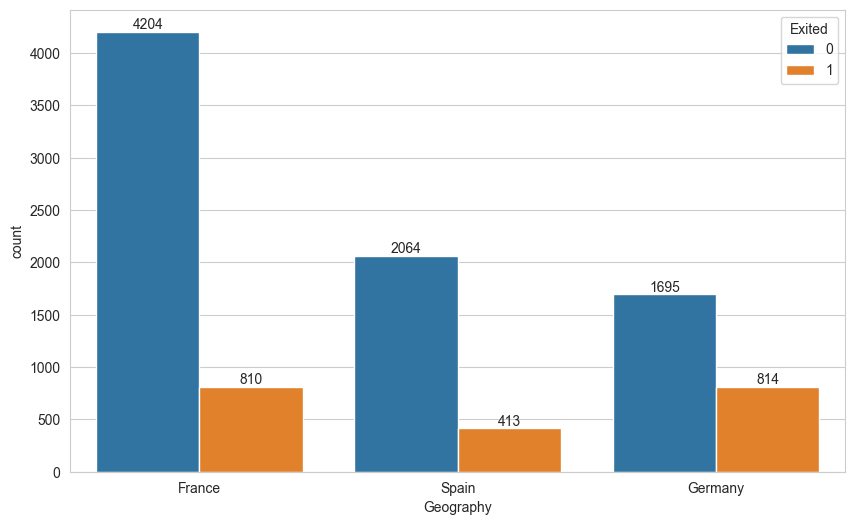

In [319]:
ax=sns.countplot(data= df , x='Geography',hue='Exited')
for i in range(df['Exited'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')
# We can see that France and germany has the majority of who Exited the bank and also note that Germany has less then half of France regarding the accounts  

In [320]:
fig3 = px.box(df, x='Geography', y='Age', color='Exited', title='Age Distribution by Geography and Exit Status')
fig3.show()
# We can see some outliers in ages in diffrent Geography location
# and most outliers are on those who stayed in the bank  

In [321]:

df.groupby('Geography')['Exited'].value_counts().unstack()

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

### Analysis of Integer and Floating-Point Columns:
In the following section, we shift our focus to the analysis of numerical attributes, specifically the integer (int) and floating-point (float) columns in the dataset. These columns often hold critical information related to customer behavior and financial characteristics.

In [322]:
df.describe().T

count       mean       std     min       25%        50%  \
CreditScore     10000.000    650.529    96.653 350.000   584.000    652.000   
Age             10000.000     38.922    10.488  18.000    32.000     37.000   
Tenure          10000.000      5.013     2.892   0.000     3.000      5.000   
Balance         10000.000  76485.889 62397.405   0.000     0.000  97198.540   
NumOfProducts   10000.000      1.530     0.582   1.000     1.000      1.000   
HasCrCard       10000.000      0.706     0.456   0.000     0.000      1.000   
IsActiveMember  10000.000      0.515     0.500   0.000     0.000      1.000   
EstimatedSalary 10000.000 100090.240 57510.493  11.580 51002.110 100193.915   
Exited          10000.000      0.204     0.403   0.000     0.000      0.000   

                       75%        max  
CreditScore        718.000    850.000  
Age                 44.000     92.000  
Tenure               7.000     10.000  
Balance         127644.240 250898.090  
NumOfProducts        2.000      4.000  
HasCrCard            1.000      1.000  
IsActiveMember       1.000      1.000  
EstimatedSalary 149388.247 199992.480  
Exited               0.000      1.000

In [323]:
df.select_dtypes(exclude='object').head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1       101348.880       1  
1               1       112542.580       0  
2               0       113931.570       1  
3               0        93826.630       0  
4               1        79084.100       0

In [324]:
df.select_dtypes(exclude='object').columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

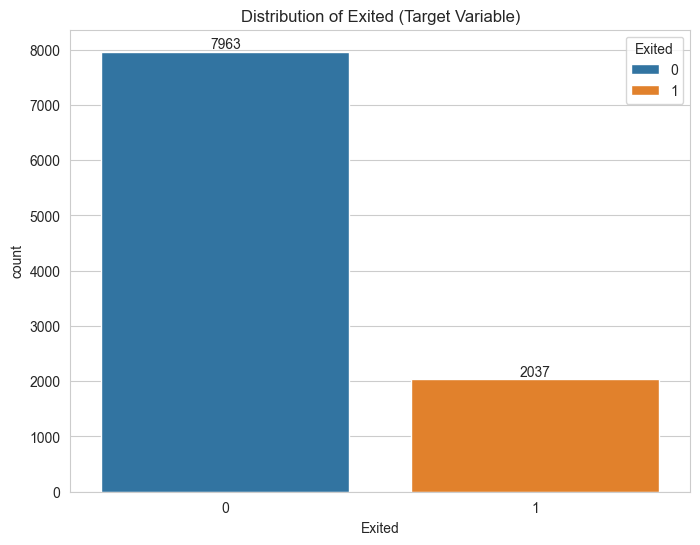

In [325]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Exited', hue='Exited')
plt.title('Distribution of Exited (Target Variable)')
for i in range(df['Exited'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')

plt.show()


In [326]:
df.groupby('IsActiveMember')['Exited'].value_counts().unstack()

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735

In [327]:
dfff = pd.DataFrame({'Category': ['Active Members', 'Inactive Members'],
                     'Count': [df[df['IsActiveMember'] == 1].shape[0], df[df['IsActiveMember'] == 0].shape[0]]})

fig = px.pie(dfff, names='Category', values='Count', title='Ratio of Active vs. Inactive Members',
             hole=0.4, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()


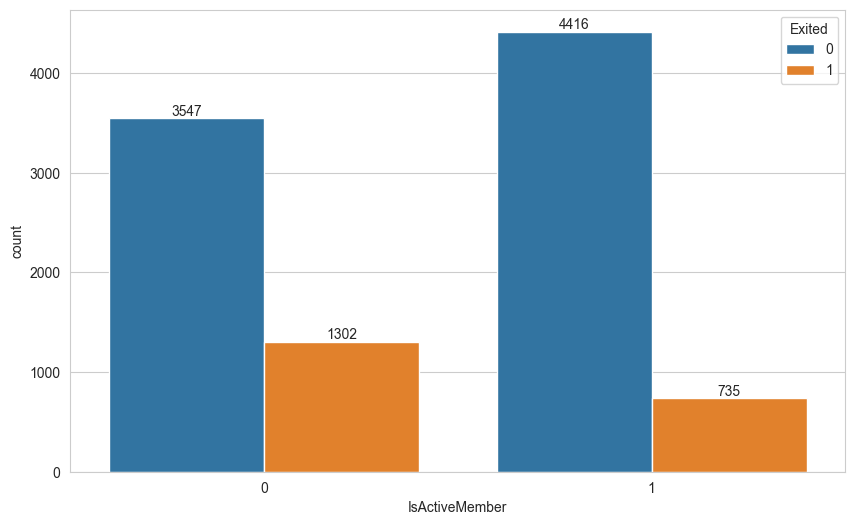

In [328]:
ax=sns.countplot(data= df , x='IsActiveMember',hue='Exited')
for i in range(df['Exited'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')
# We can see that most who left the bank are who is not Active So we can inhance the custmoer experiance so we can reduce who left 

In [329]:
df.groupby('HasCrCard')['Exited'].value_counts().unstack()

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424

In [330]:
import plotly.express as px

dfff = pd.DataFrame({'Category': ['Has Credit Card', 'No Credit Card'],
                     'Count': [df[df['HasCrCard'] == 1].shape[0], df[df['HasCrCard'] == 0].shape[0]]})

fig = px.pie(dfff, names='Category', values='Count', title='Ratio of Having vs. Not Having Credit Card',
             hole=0.4, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()


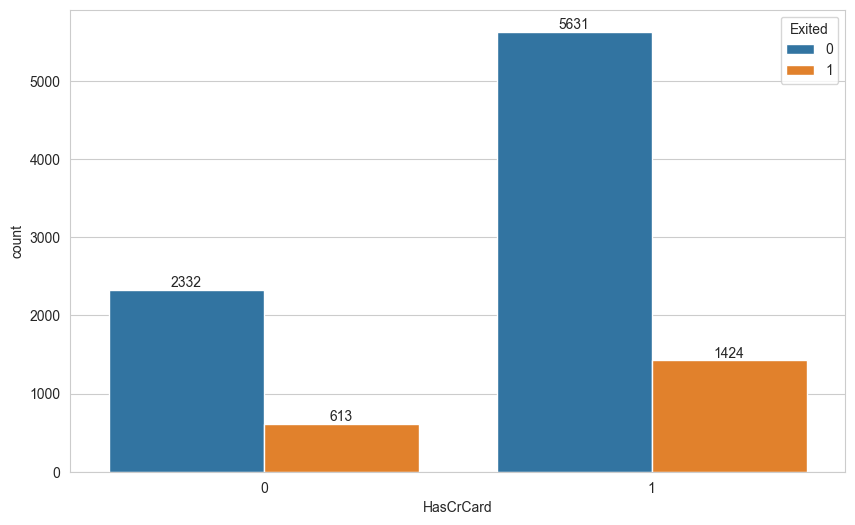

In [331]:
ax=sns.countplot(data= df , x='HasCrCard',hue='Exited')
for i in range(df['Exited'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')
# For some Reason most of the customers who has a card credit left the bank

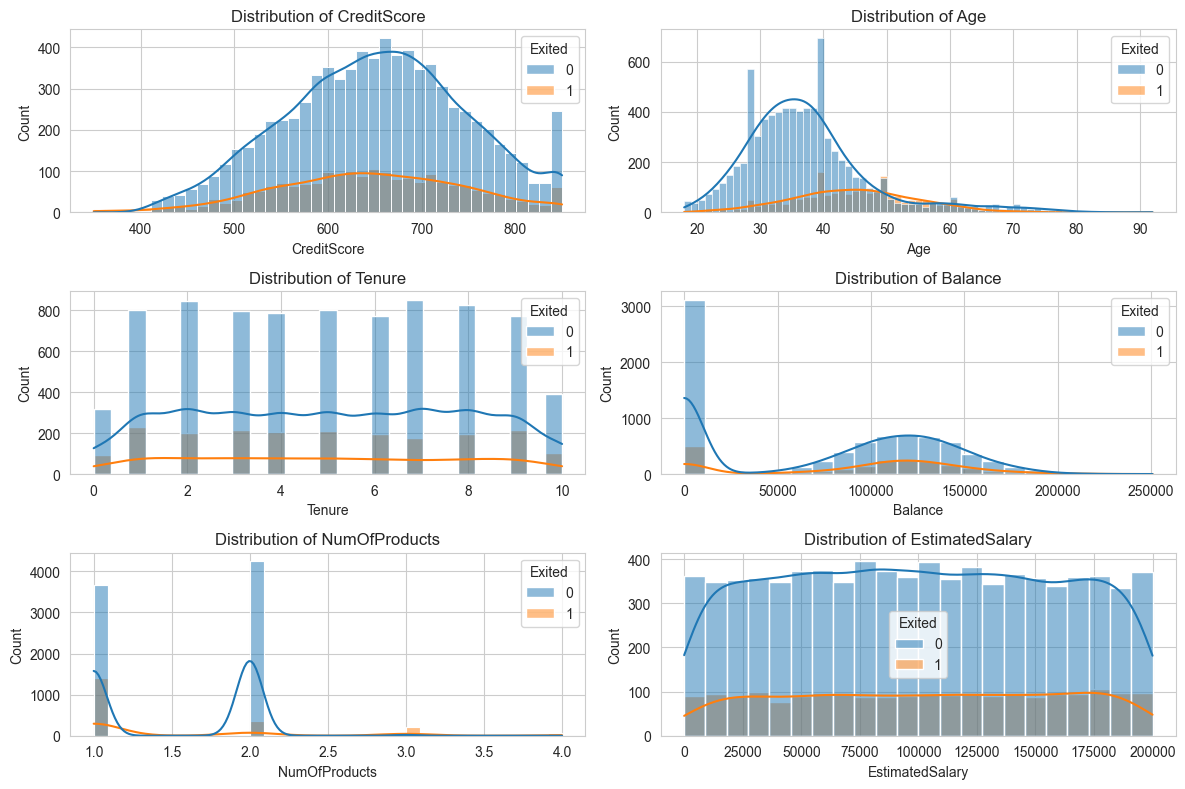

In [332]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(data=df, x=feature, hue='Exited', kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
# we can see that most off them are normaly distibution , and there is like the age is right skew 

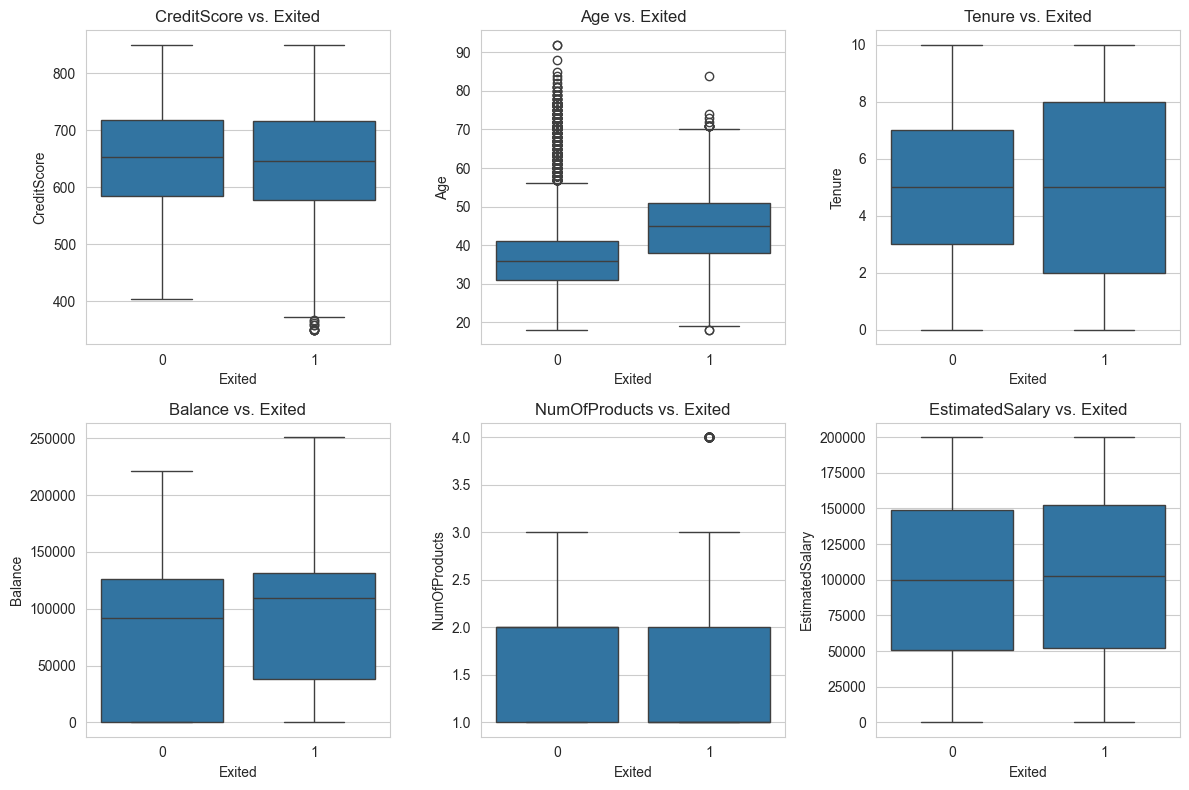

In [333]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(data=df, x='Exited', y=feature)
    plt.title(f'{feature} vs. Exited')

plt.tight_layout()
plt.show()


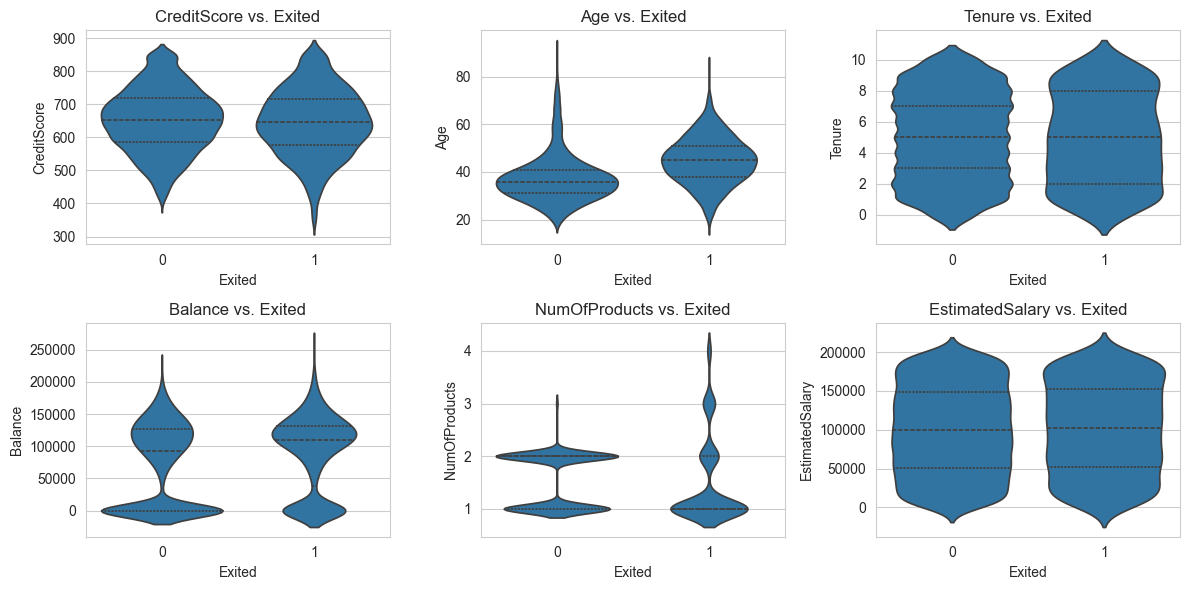

In [334]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i) 
    sns.violinplot(data=df, x='Exited', y=feature, inner='quartile')
    plt.title(f'{feature} vs. Exited')

plt.tight_layout()
plt.show()


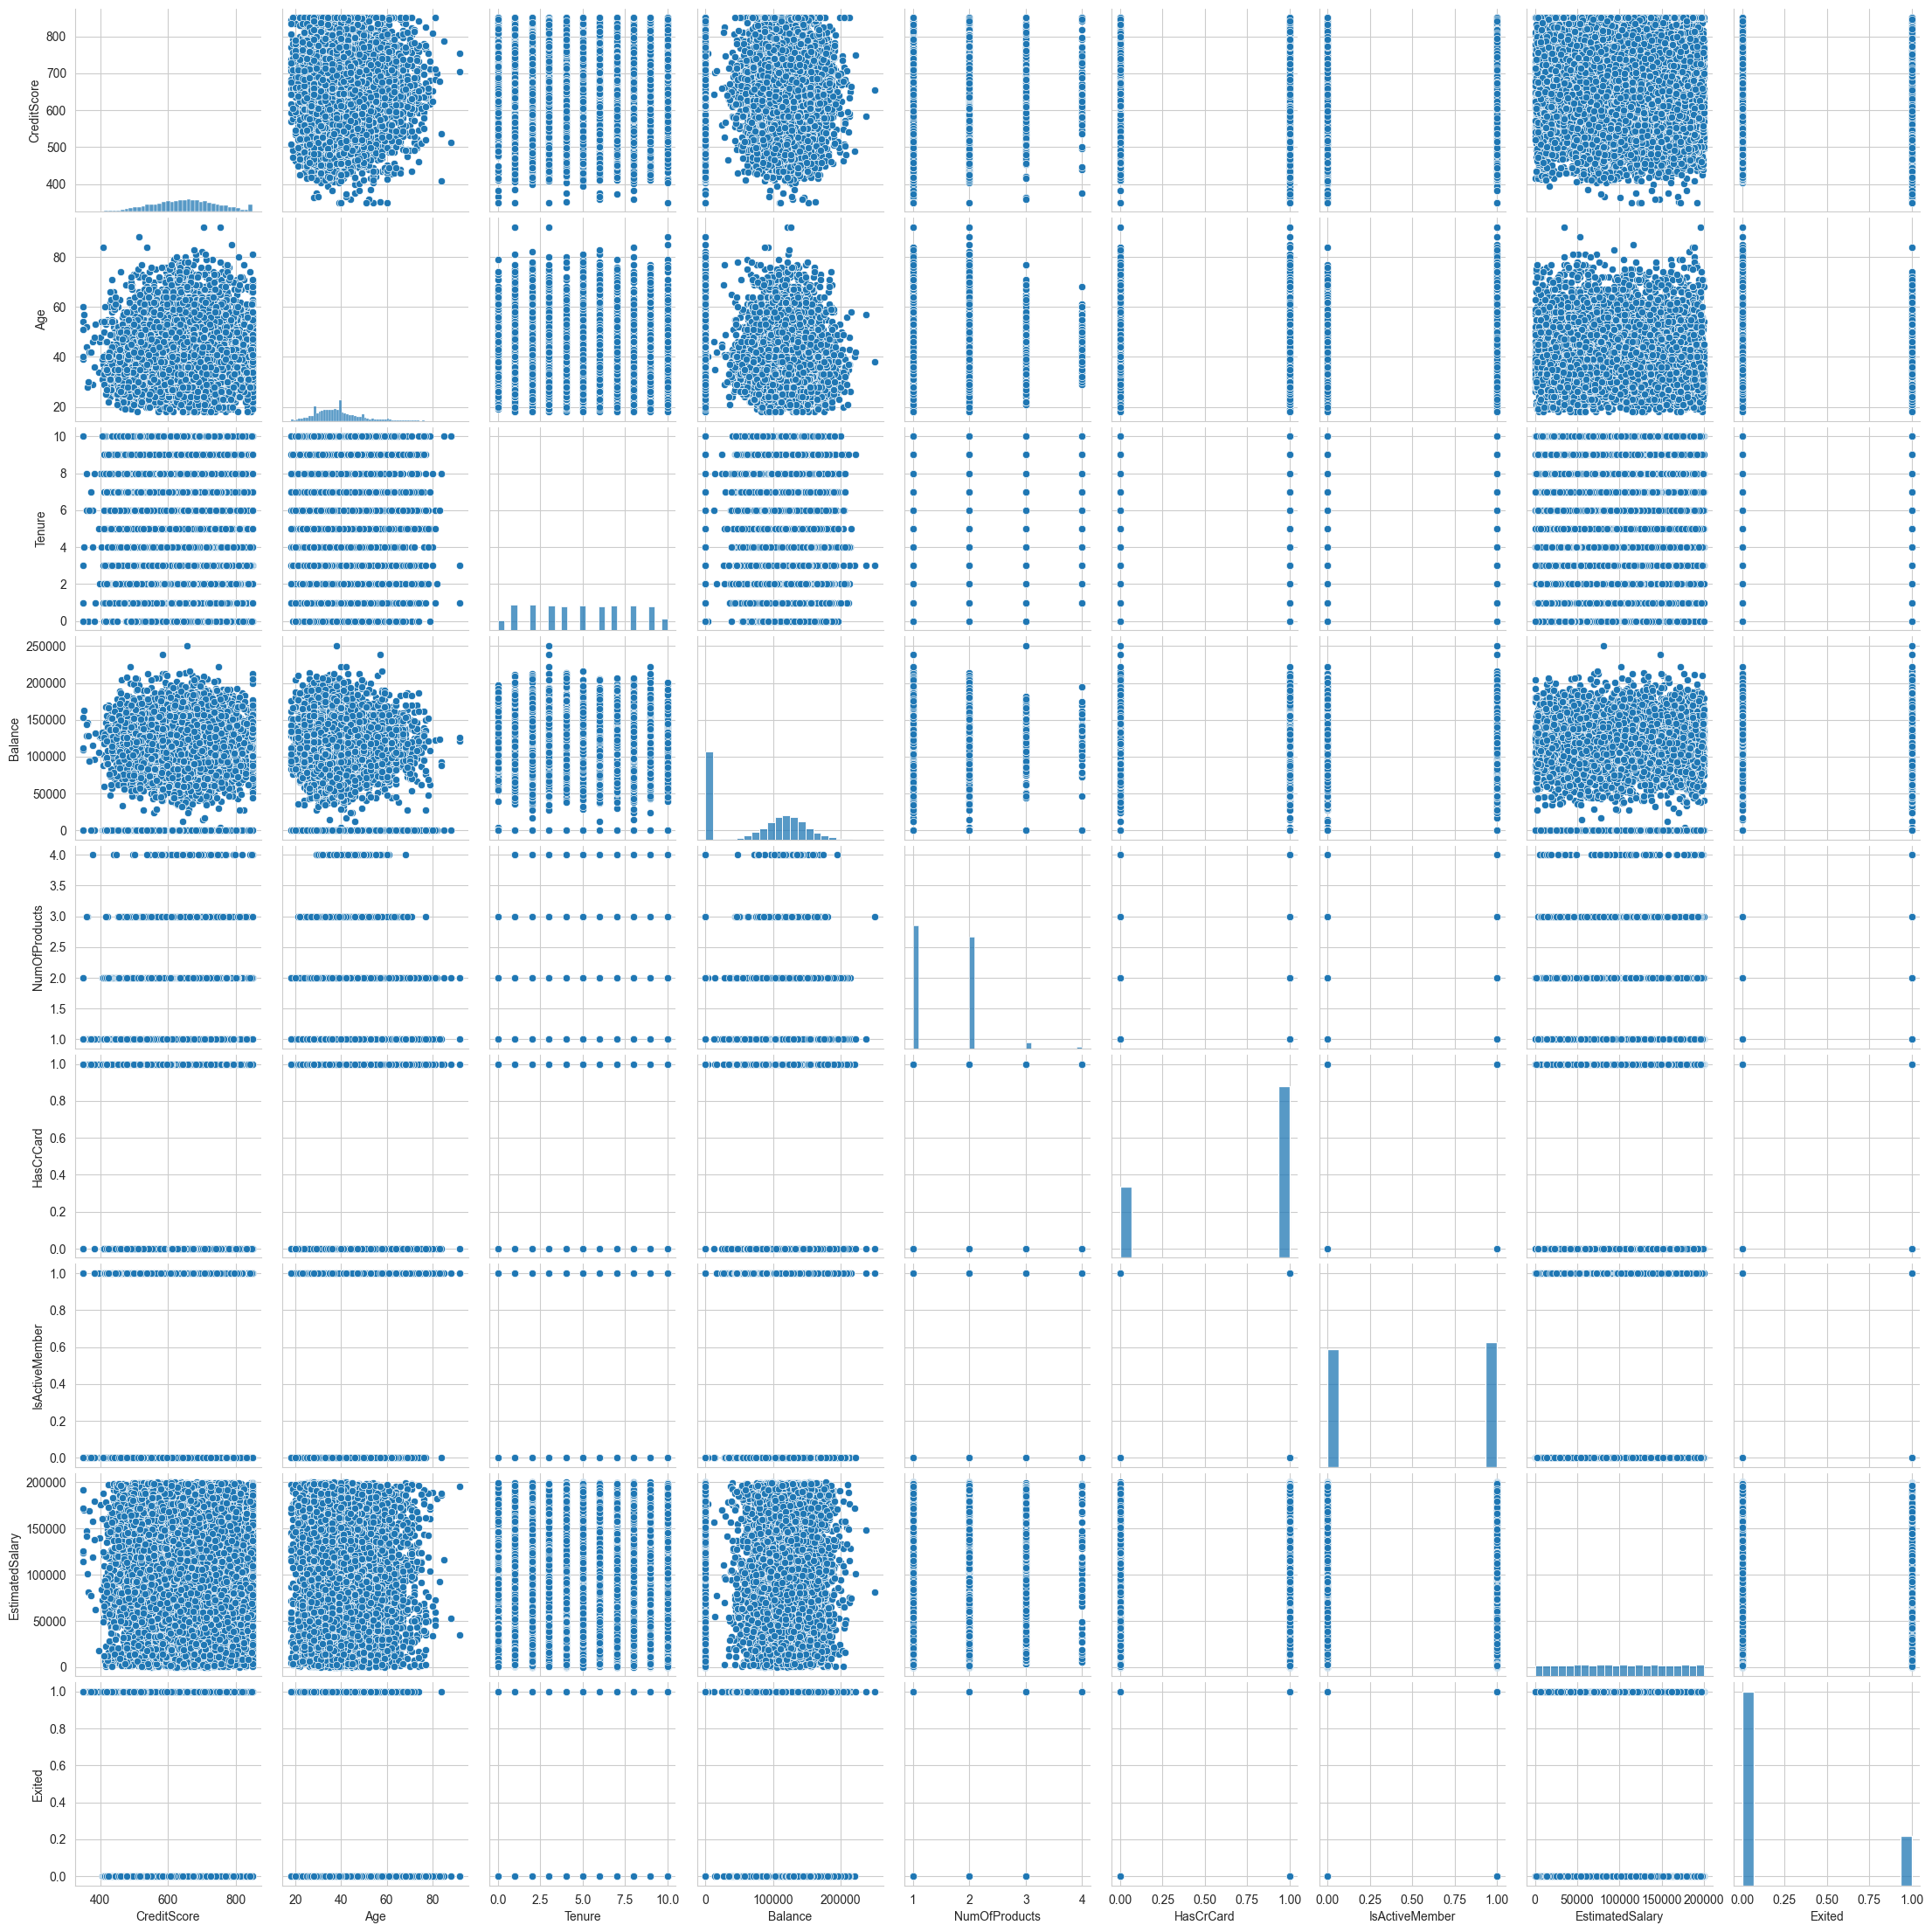

In [335]:
sns.pairplot(df)

In [336]:
df.select_dtypes(exclude=['object']).corr()

CreditScore    Age  Tenure  Balance  NumOfProducts  \
CreditScore            1.000 -0.004   0.001    0.006          0.012   
Age                   -0.004  1.000  -0.010    0.028         -0.031   
Tenure                 0.001 -0.010   1.000   -0.012          0.013   
Balance                0.006  0.028  -0.012    1.000         -0.304   
NumOfProducts          0.012 -0.031   0.013   -0.304          1.000   
HasCrCard             -0.005 -0.012   0.023   -0.015          0.003   
IsActiveMember         0.026  0.085  -0.028   -0.010          0.010   
EstimatedSalary       -0.001 -0.007   0.008    0.013          0.014   
Exited                -0.027  0.285  -0.014    0.119         -0.048   

                 HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CreditScore         -0.005           0.026           -0.001  -0.027  
Age                 -0.012           0.085           -0.007   0.285  
Tenure               0.023          -0.028            0.008  -0.014  
Balance             -0.015          -0.010            0.013   0.119  
NumOfProducts        0.003           0.010            0.014  -0.048  
HasCrCard            1.000          -0.012           -0.010  -0.007  
IsActiveMember      -0.012           1.000           -0.011  -0.156  
EstimatedSalary     -0.010          -0.011            1.000   0.012  
Exited              -0.007          -0.156            0.012   1.000

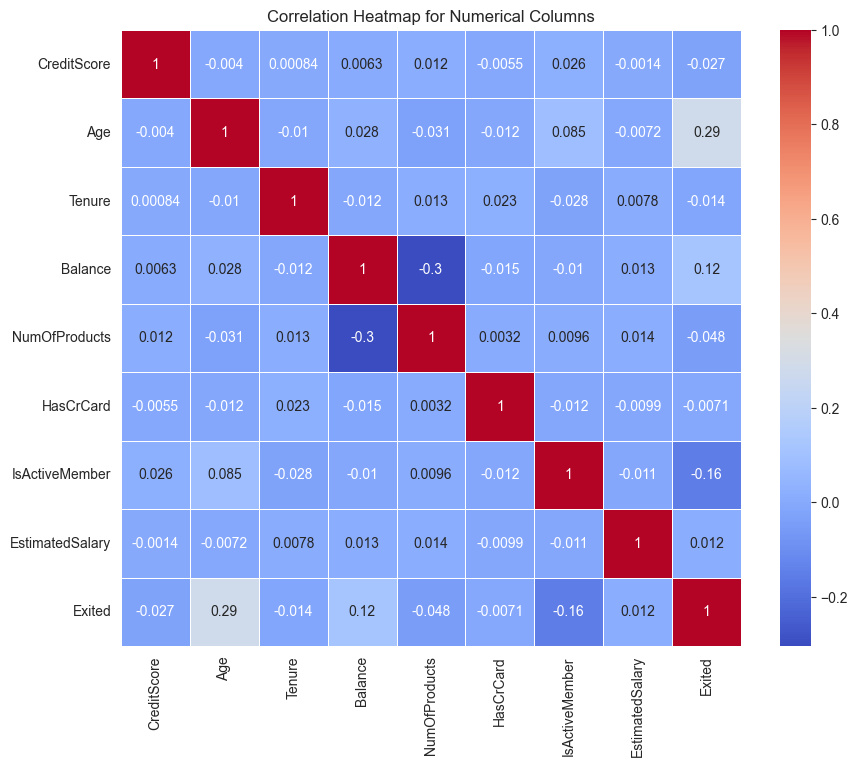

In [337]:

correlation_matrix = df.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


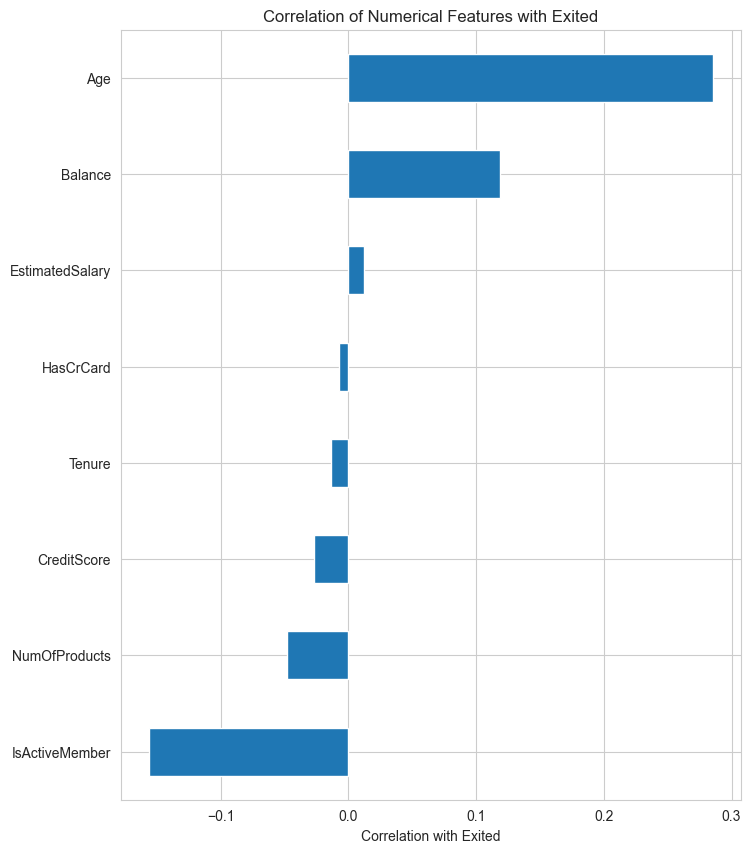

In [338]:
correlation_series = df.select_dtypes(exclude=['object']).corr()['Exited'].drop("Exited")

plt.figure(figsize=(8, 10))
correlation_series.sort_values().plot(kind="barh")
plt.xlabel("Correlation with Exited")
plt.title("Correlation of Numerical Features with Exited")
plt.show()


In [339]:
# This cell of code performs outlier detection for numerical columns in a DataFrame.
# It calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each column,
# and identifies outliers using the IQR method. Outliers are counted and the results are stored in a DataFrame.

numerical_columns = df.select_dtypes(exclude=['object']).columns.difference(['Exited']) # we need to not re check the Target columns to see the outliers because it will give an outliaers and in we look close we know it's checking for a discreat column which is the tanget and has two classes 
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_data = []

for column in numerical_columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    column_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    outlier_count = column_outliers.sum()
    outlier_data.append({'Column': column, 'Outlier Count': outlier_count})

outlier_counts = pd.DataFrame(outlier_data)


In [340]:
print(f'''
------------Outliers------------
{outlier_counts}
------------Total------------
             {outlier_counts['Outlier Count'].sum()}''')


------------Outliers------------
            Column  Outlier Count
0              Age            359
1          Balance              0
2      CreditScore             15
3  EstimatedSalary              0
4        HasCrCard              0
5   IsActiveMember              0
6    NumOfProducts             60
7           Tenure              0
------------Total------------
             434


In [341]:
# using the IQR method separately for each class within the 'Exited' column. The results, including
# class labels, column names, and outlier counts, are stored in a DataFrame called 'outlier_counts_by_class'.
numerical_columns = df.select_dtypes(exclude=['object']).columns.difference(['Exited']) 
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_data = []

for class_label in df['Exited'].unique():
    class_data = df[df['Exited'] == class_label]

    for column in numerical_columns:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        column_outliers = ((class_data[column] < lower_bound) | (class_data[column] > upper_bound))
        outlier_count = column_outliers.sum()

        outlier_data.append({
            'Class': class_label,
            'Column': column,
            'Outlier Count': outlier_count
        })

outlier_counts_by_class = pd.DataFrame(outlier_data)


In [342]:
print(f'''
------------Outliers------------
{outlier_counts_by_class}
------------Total------------
             {outlier_counts_by_class['Outlier Count'].sum()}''')


------------Outliers------------
    Class           Column  Outlier Count
0       1              Age             73
1       1          Balance              0
2       1      CreditScore             15
3       1  EstimatedSalary              0
4       1        HasCrCard              0
5       1   IsActiveMember              0
6       1    NumOfProducts             60
7       1           Tenure              0
8       0              Age            286
9       0          Balance              0
10      0      CreditScore              0
11      0  EstimatedSalary              0
12      0        HasCrCard              0
13      0   IsActiveMember              0
14      0    NumOfProducts              0
15      0           Tenure              0
------------Total------------
             434


In [343]:
outlier_counts_by_class.groupby('Class')['Outlier Count'].sum()

Class
0    286
1    148
Name: Outlier Count, dtype: int64

In [344]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [345]:
print('Shape of df Before encoding',df.shape)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df = pd.get_dummies(df, columns=['Geography'], prefix=['Geography'])
print('Shape of df After encoding',df.shape)


Shape of df Before encoding (10000, 11)
Shape of df After encoding (10000, 13)


In [346]:
df[['Geography_France','Geography_Germany','Geography_Spain']].head()

Geography_France  Geography_Germany  Geography_Spain
0              True              False            False
1             False              False             True
2              True              False            False
3              True              False            False
4             False              False             True

In [347]:
for column in df.columns:
    df[column] = df[column].astype(int)

In [348]:
df[['Geography_France','Geography_Germany','Geography_Spain']].head()

Geography_France  Geography_Germany  Geography_Spain
0                 1                  0                0
1                 0                  0                1
2                 1                  0                0
3                 1                  0                0
4                 0                  0                1

In [349]:
df.shape

(10000, 13)

# Preprocessing of Data
- Train | Test Split, Scalling

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [351]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [352]:
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (10000, 12)
Shape of Y is  : (10000,)
Shape of df is : (10000, 13)


In [353]:
seed = 13

In [354]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [355]:
print('''
X_train Shape is {}
X_test, Shape is {}
y_train Shape is {} 
y_test  Shape is {}
'''.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))


X_train Shape is (9000, 12)
X_test, Shape is (1000, 12)
y_train Shape is (9000,) 
y_test  Shape is (1000,)



In [356]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [357]:
print('''
Scaling ------
X_train Shape is {}
X_test, Shape is {}
'''.format(X_train.shape, X_test.shape))


Scaling ------
X_train Shape is (9000, 12)
X_test, Shape is (1000, 12)



# Modelling & Model Performance

## without class_weigth

### Create The Model

In [408]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score,recall_score
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV
from tensorflow.keras.optimizers.legacy import Adam

In [362]:
# model = Sequential() 
# model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
# model.add(Dense(12, activation = "relu"))
# model.add(Dense(1, activation  = "sigmoid"))
# opt = Adam(lr = 0.001)
# model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["Recall"])

In [363]:
model = Sequential()
model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001) # Defult value 
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

In [364]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=64, epochs=500, verbose=1
)

Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.7953 - val_loss: 0.4614 - val_accuracy: 0.8056
Epoch 2/500
127/127 [==============================] - 0s 964us/step - loss: 0.4663 - accuracy: 0.7968 - val_loss: 0.4490 - val_accuracy: 0.8111
Epoch 3/500
127/127 [==============================] - 0s 968us/step - loss: 0.4548 - accuracy: 0.8037 - val_loss: 0.4391 - val_accuracy: 0.8100
Epoch 4/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8078 - val_loss: 0.4297 - val_accuracy: 0.8156
Epoch 5/500
127/127 [==============================] - 0s 926us/step - loss: 0.4378 - accuracy: 0.8112 - val_loss: 0.4235 - val_accuracy: 0.8200
Epoch 6/500
127/127 [==============================] - 0s 943us/step - loss: 0.4322 - accuracy: 0.8127 - val_loss: 0.4201 - val_accuracy: 0.8200
Epoch 7/500
127/127 [==============================] - 0s 945us/step - loss: 0.4284 - accuracy: 0.8160 - val_loss: 0.4194 - val_accura

In [365]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dense_7 (Dense)             (None, 12)                300       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [366]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.494     0.795     0.461         0.806
1 0.466     0.797     0.449         0.811
2 0.455     0.804     0.439         0.810
3 0.445     0.808     0.430         0.816
4 0.438     0.811     0.424         0.820

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

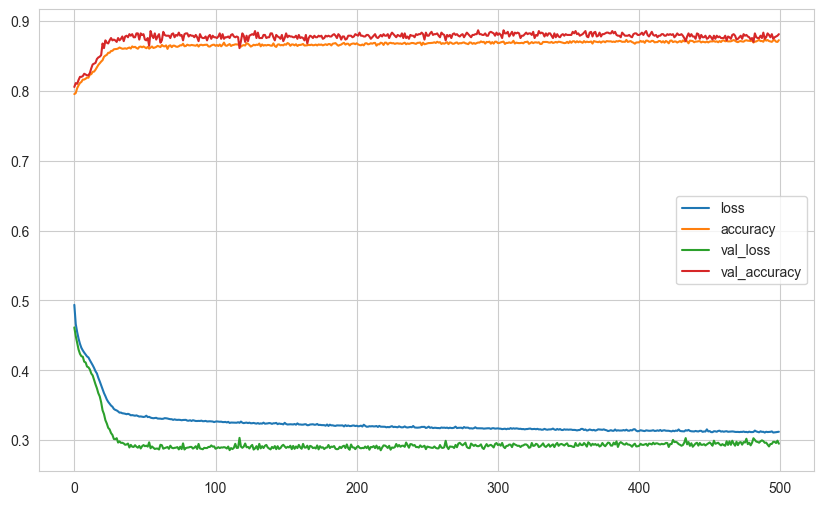

In [367]:
loss_df.plot()
plt.show()

In [420]:
from sklearn.metrics import roc_curve, auc

def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on the test and training sets
    y_pred = model.predict(X_test) > 0.5
    y_train_pred = model.predict(X_train) > 0.5
    y_pred_p = model.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot and display the confusion matrix for the test set
    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title('Test Set Confusion Matrix')

    # Plot and display the confusion matrix for the training set
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title('Training Set Confusion Matrix')

    plt.show()

    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_pred)

    print(f'''
-----------------------------Train Results-----------------------------
{train_report}
                        
-----------------------------Test Results-----------------------------
{test_report}
''')
    print('-----------------------------precision_recall_curve-----------------------------')
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_p)
    plt.plot(recalls, precisions, label='ANN')
    plt.xlabel('Recalls')
    plt.ylabel('Precisions')
    plt.title('Precision-Recall Curve')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    print('-----------------------------Receiver Operating Characteristic-----------------------------')

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
# This function is used to evaluate a binary classification model's performance.
# It calculates and displays various metrics, including confusion matrices, classification reports,
# precision-recall curves, and receiver operating characteristic (ROC) curves for both the training
# and test datasets. The model's predictions are compared to the ground truth labels, and the results
# are visualized to assess the model's performance.
# Usage example:
# evaluate_classification_model(model, X_train, y_train, X_test, y_test)


In [421]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))


Loss is :   0.36671075224876404
Accuracy is 0.8450000286102295


32/32 [==============================] - 0s 415us/step


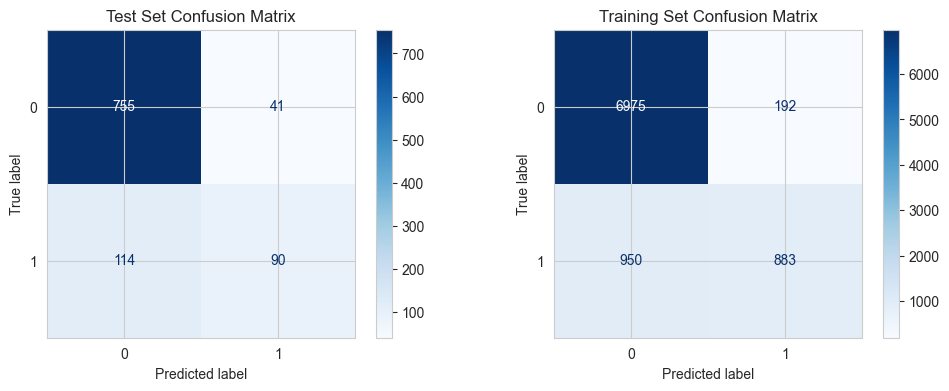


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7167
           1       0.82      0.48      0.61      1833

    accuracy                           0.87      9000
   macro avg       0.85      0.73      0.77      9000
weighted avg       0.87      0.87      0.86      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.69      0.44      0.54       204

    accuracy                           0.84      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.84      0.83      1000


-----------------------------precision_recall_curve-----------------------------


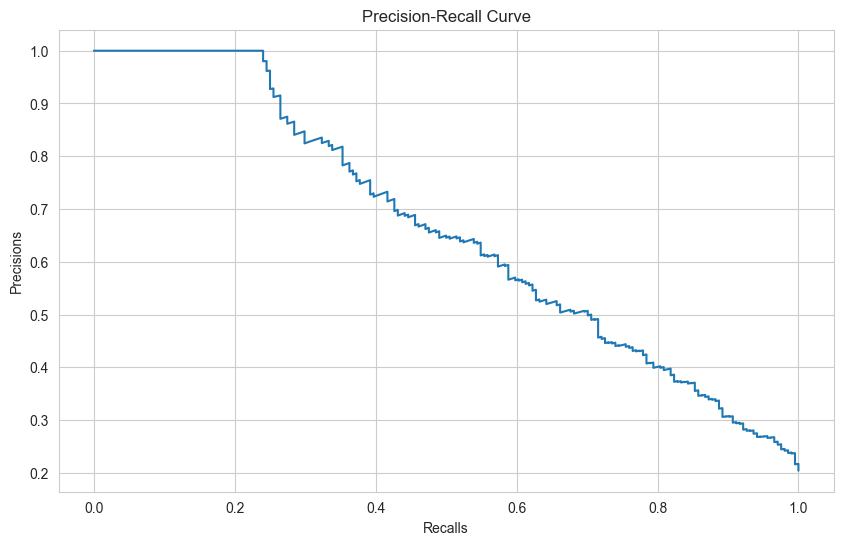

-----------------------------Receiver Operating Characteristic-----------------------------


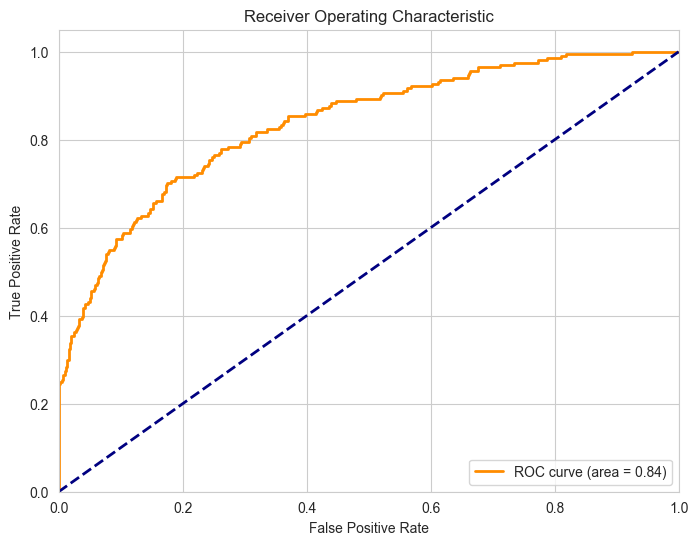

In [423]:
evaluate_classification_model(model, X_train, y_train, X_test, y_test)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [424]:
from sklearn.utils import class_weight

In [425]:
model1 = Sequential()
model1.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model1.add(Dense(12, activation = "relu"))
model1.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model1.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

In [437]:
# Calculate class weights to address class imbalance in the training data. 
# The 'balanced' option assigns weights inversely proportional to class frequencies,
# giving more weight to underrepresented classes. This helps the model to better handle
# imbalanced datasets and make training more effective.
class_weights = class_weight.compute_class_weight('balanced',
                                                   classes=np.unique(y_train),
                                                   y=y_train)
class_weights

array([0.62787777, 2.45499182])

In [438]:
# Create a dictionary of class weights to be used during model training.
class_weights = {0: class_weights[0], 1:class_weights[1]}
class_weights


{0: 0.6278777731268314, 1: 2.454991816693944}

In [439]:
model1.fit(x=X_train, y=y_train,validation_split=0.1, class_weight=class_weights, batch_size=64,verbose=1,epochs=500)

Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.6840 - accuracy: 0.5537 - val_loss: 0.6141 - val_accuracy: 0.6944
Epoch 2/500
127/127 [==============================] - 0s 979us/step - loss: 0.6382 - accuracy: 0.6757 - val_loss: 0.6535 - val_accuracy: 0.6267
Epoch 3/500
127/127 [==============================] - 0s 972us/step - loss: 0.6108 - accuracy: 0.6731 - val_loss: 0.6212 - val_accuracy: 0.6689
Epoch 4/500
127/127 [==============================] - 0s 961us/step - loss: 0.5939 - accuracy: 0.6841 - val_loss: 0.5529 - val_accuracy: 0.7278
Epoch 5/500
127/127 [==============================] - 0s 970us/step - loss: 0.5832 - accuracy: 0.6917 - val_loss: 0.5661 - val_accuracy: 0.7067
Epoch 6/500
127/127 [==============================] - 0s 969us/step - loss: 0.5726 - accuracy: 0.7006 - val_loss: 0.5640 - val_accuracy: 0.7056
Epoch 7/500
127/127 [==============================] - 0s 943us/step - loss: 0.5632 - accuracy: 0.7133 - val_loss: 0.5600 - val_accu

In [441]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                312       
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [444]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.684     0.554     0.614         0.694
1 0.638     0.676     0.653         0.627
2 0.611     0.673     0.621         0.669
3 0.594     0.684     0.553         0.728
4 0.583     0.692     0.566         0.707

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [448]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))
# These metrics provide insights into the model's performance on unseen data, helping to assess its generalization capabilities.



Loss is :   0.5054774284362793
Accuracy is 0.765999972820282


<Axes: >

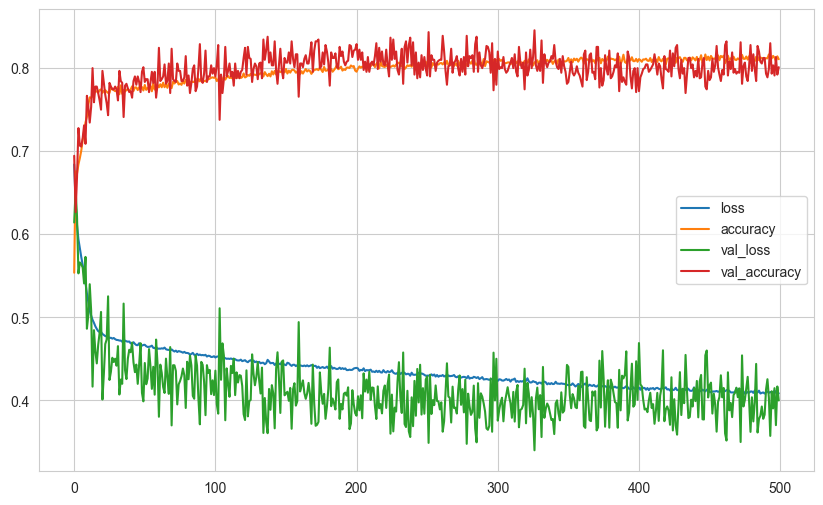

In [447]:
loss_df.plot()

32/32 [==============================] - 0s 419us/step


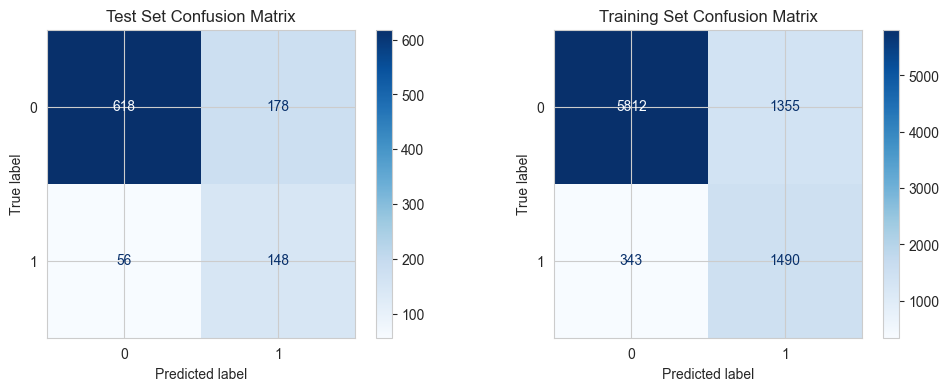


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7167
           1       0.52      0.81      0.64      1833

    accuracy                           0.81      9000
   macro avg       0.73      0.81      0.75      9000
weighted avg       0.86      0.81      0.82      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.45      0.73      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.78      1000


-----------------------------precision_recall_curve-----------------------------


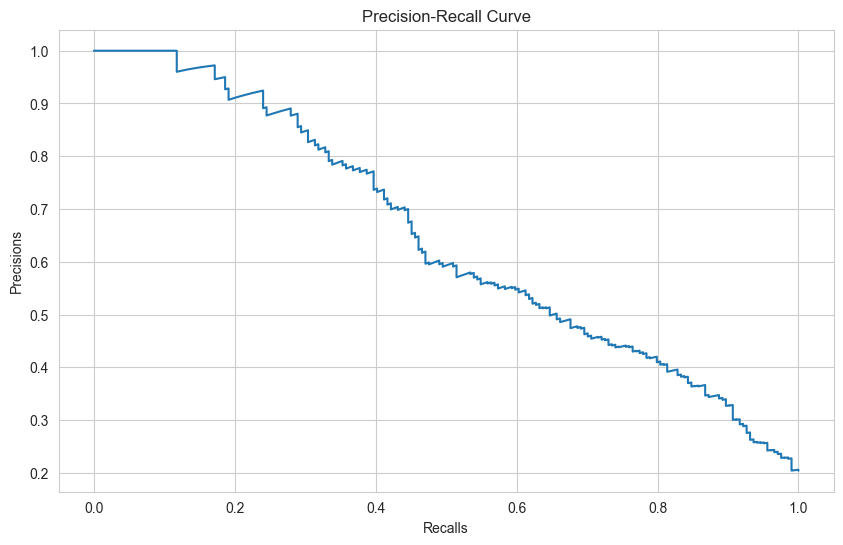

-----------------------------Receiver Operating Characteristic-----------------------------


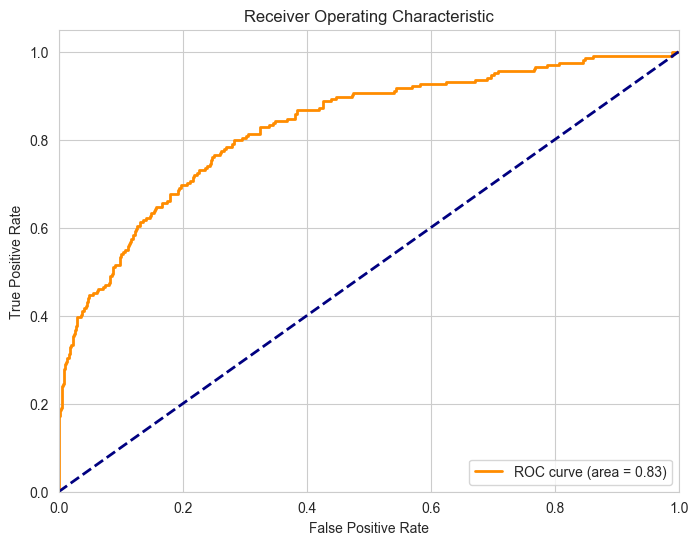

In [446]:
evaluate_classification_model(model1, X_train, y_train, X_test, y_test)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [449]:
model3 = Sequential()
model3.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model3.add(Dense(12, activation = "relu"))
model3.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.01)
model3.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

In [450]:
model3.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1, class_weight=class_weights)

Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.6323 - accuracy: 0.6364 - val_loss: 0.5442 - val_accuracy: 0.7522
Epoch 2/500
127/127 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7094 - val_loss: 0.4537 - val_accuracy: 0.7956
Epoch 3/500
127/127 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.7474 - val_loss: 0.4880 - val_accuracy: 0.7578
Epoch 4/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7547 - val_loss: 0.4558 - val_accuracy: 0.7833
Epoch 5/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7730 - val_loss: 0.3981 - val_accuracy: 0.8122
Epoch 6/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7778 - val_loss: 0.3972 - val_accuracy: 0.8222
Epoch 7/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7802 - val_loss: 0.4918 - val_accuracy: 0.7744

In [454]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.632     0.636     0.544         0.752
1 0.572     0.709     0.454         0.796
2 0.522     0.747     0.488         0.758
3 0.497     0.755     0.456         0.783
4 0.484     0.773     0.398         0.812

<Axes: >

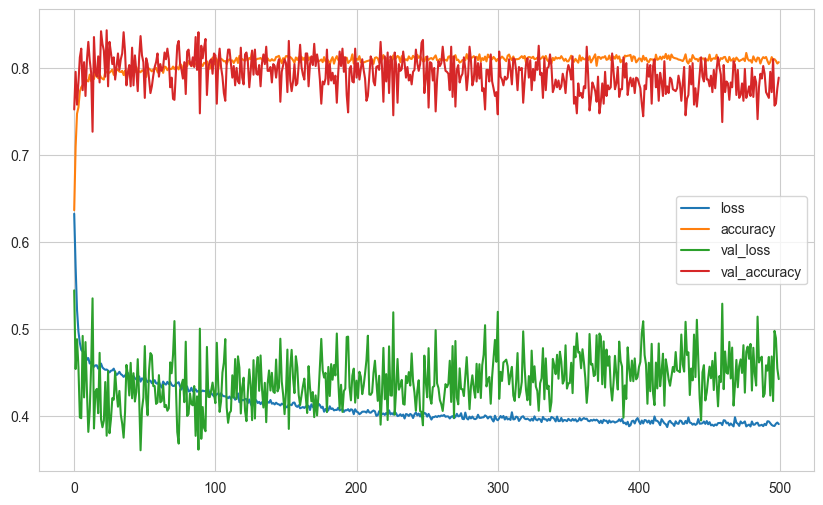

In [455]:
loss_df.plot()

    If you increase the learning rate too much, the optimization process might become unstable. The model's parameter updates could overshoot the optimal values, causing the loss error to increase. This is often referred to as "diverging" and indicates that the learning rate is too high.

In [456]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))



Loss is :   0.5054774284362793
Accuracy is 0.765999972820282


32/32 [==============================] - 0s 418us/step


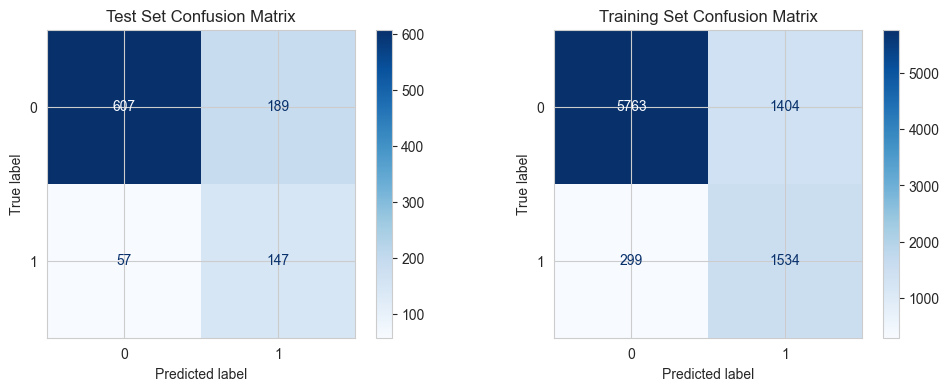


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7167
           1       0.52      0.84      0.64      1833

    accuracy                           0.81      9000
   macro avg       0.74      0.82      0.76      9000
weighted avg       0.86      0.81      0.82      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       796
           1       0.44      0.72      0.54       204

    accuracy                           0.75      1000
   macro avg       0.68      0.74      0.69      1000
weighted avg       0.82      0.75      0.77      1000


-----------------------------precision_recall_curve-----------------------------


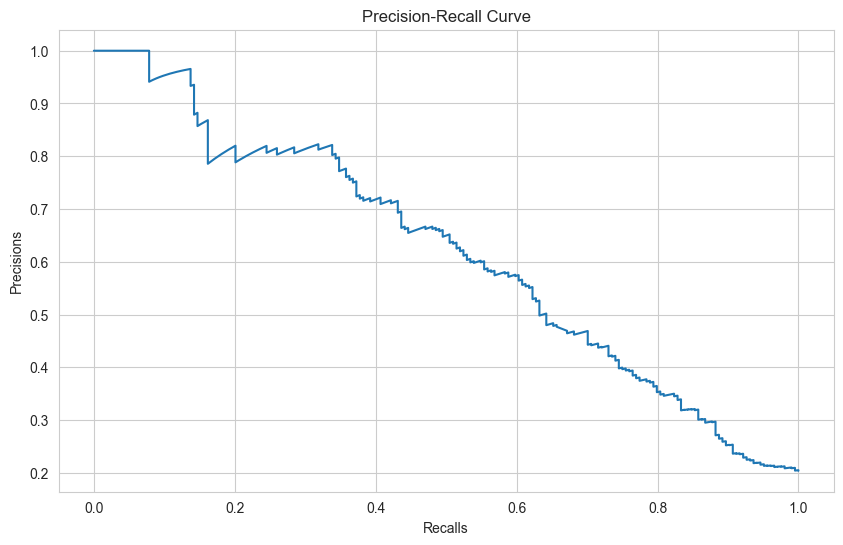

-----------------------------Receiver Operating Characteristic-----------------------------


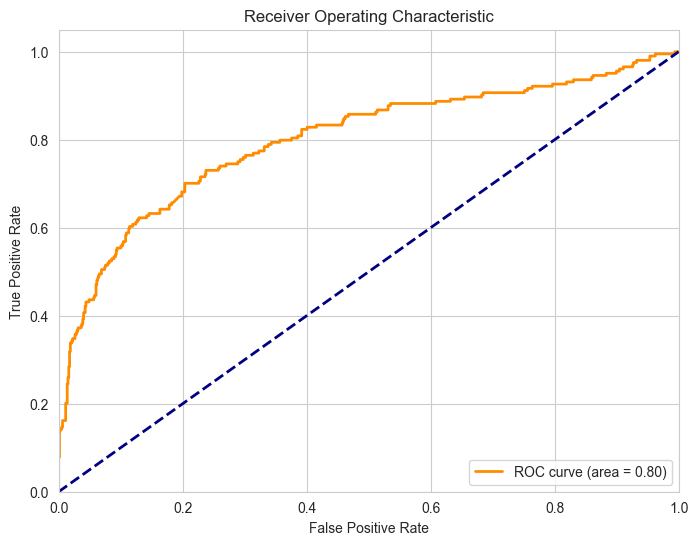

In [457]:
evaluate_classification_model(model3, X_train, y_train, X_test, y_test)


### Add Dropout Layer

In [458]:
from tensorflow.keras.layers import Dropout

In [460]:
model4 = Sequential()
model4.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model4.add(Dropout(0.25))# dropout layers to prevent overfitting
model4.add(Dense(12, activation = "relu"))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001) # which is the defult value for the learninig rate 
model4.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])


In [461]:
model4.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose = 1, class_weight=class_weights)


Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.6530 - val_loss: 0.6601 - val_accuracy: 0.6522
Epoch 2/500
127/127 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5933 - val_loss: 0.6350 - val_accuracy: 0.6733
Epoch 3/500
127/127 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6210 - val_loss: 0.6515 - val_accuracy: 0.6178
Epoch 4/500
127/127 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6146 - val_loss: 0.6466 - val_accuracy: 0.6244
Epoch 5/500
127/127 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6185 - val_loss: 0.6297 - val_accuracy: 0.6533
Epoch 6/500
127/127 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6351 - val_loss: 0.5970 - val_accuracy: 0.6933
Epoch 7/500
127/127 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6427 - val_loss: 0.6160 - val_accuracy: 0.6567

In [462]:
loss_df = pd.DataFrame(model4.history.history)
loss_df


loss  accuracy  val_loss  val_accuracy
0   0.694     0.653     0.660         0.652
1   0.674     0.593     0.635         0.673
2   0.663     0.621     0.651         0.618
3   0.648     0.615     0.647         0.624
4   0.645     0.619     0.630         0.653
..    ...       ...       ...           ...
495 0.463     0.782     0.416         0.783
496 0.458     0.788     0.430         0.772
497 0.461     0.783     0.431         0.773
498 0.461     0.784     0.441         0.773
499 0.456     0.781     0.414         0.786

[500 rows x 4 columns]

<Axes: >

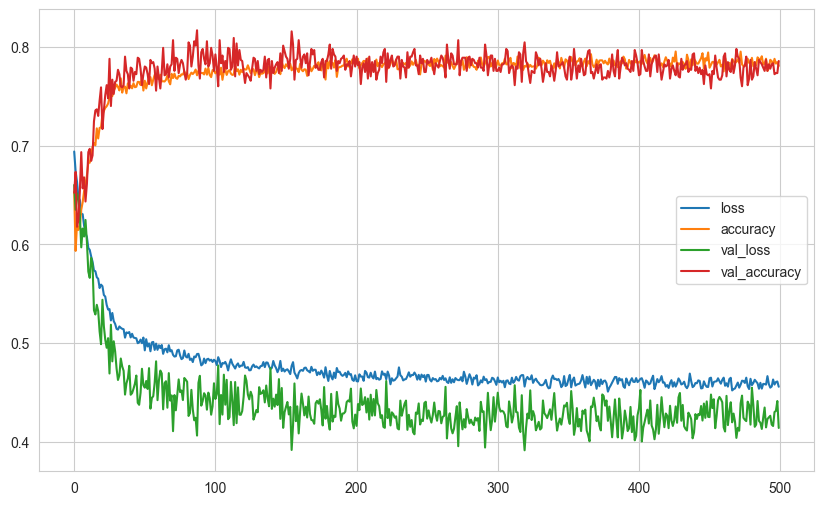

In [463]:
loss_df.plot()

In [464]:
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))



Loss is :   0.4812278747558594
Accuracy is 0.7570000290870667


32/32 [==============================] - 0s 416us/step


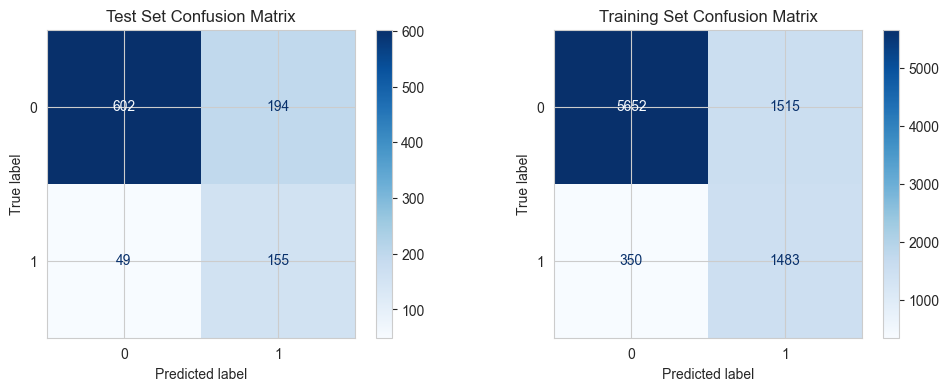


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7167
           1       0.49      0.81      0.61      1833

    accuracy                           0.79      9000
   macro avg       0.72      0.80      0.74      9000
weighted avg       0.85      0.79      0.81      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       796
           1       0.44      0.76      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000


-----------------------------precision_recall_curve-----------------------------


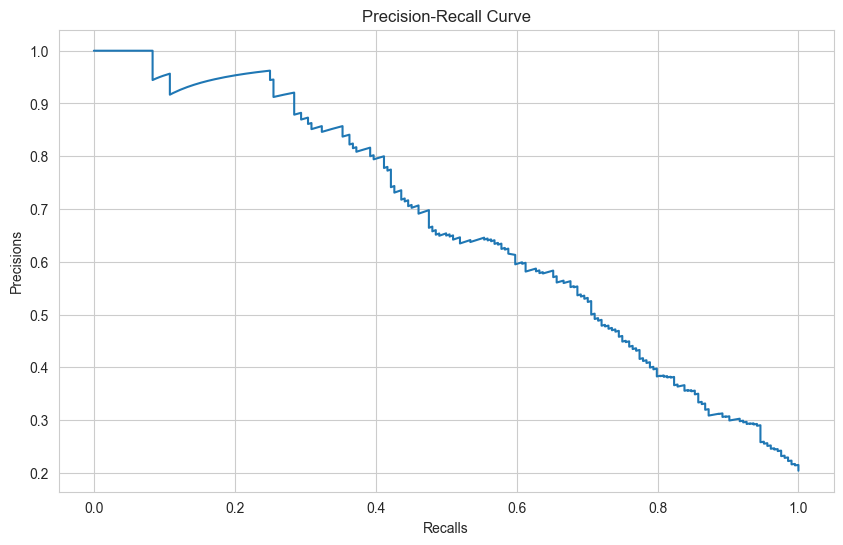

-----------------------------Receiver Operating Characteristic-----------------------------


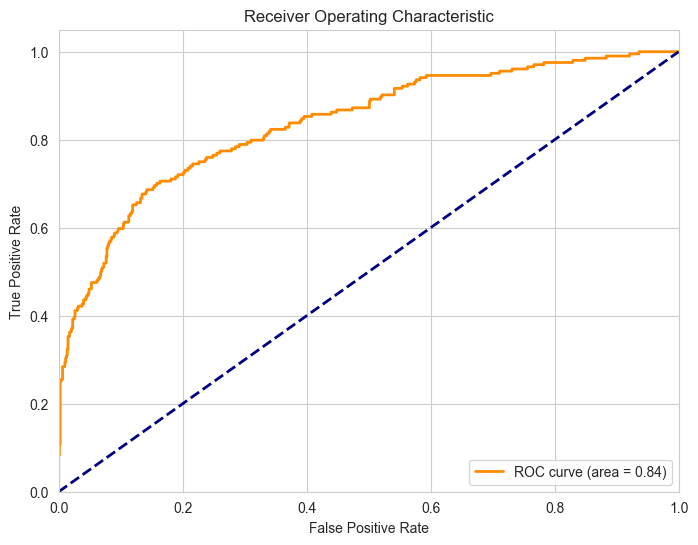

In [465]:
evaluate_classification_model(model4, X_train, y_train, X_test, y_test)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [466]:
from tensorflow.keras.callbacks import EarlyStopping


In [470]:
model5 = Sequential()
model5.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model5.add(Dense(12, activation = "relu"))
model5.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001) # which is the defult value for the learninig rate 
model5.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])


In [471]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=30, restore_best_weights=True
)

In [472]:
model5.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=1000,  callbacks=[early_stop], class_weight=class_weights)



Epoch 1/1000
127/127 [==============================] - 1s 2ms/step - loss: 0.6739 - accuracy: 0.6325 - val_loss: 0.6308 - val_accuracy: 0.6589
Epoch 2/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6598 - val_loss: 0.6326 - val_accuracy: 0.6667
Epoch 3/1000
127/127 [==============================] - 0s 965us/step - loss: 0.6035 - accuracy: 0.6831 - val_loss: 0.6009 - val_accuracy: 0.6989
Epoch 4/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.6967 - val_loss: 0.5669 - val_accuracy: 0.7244
Epoch 5/1000
127/127 [==============================] - 0s 952us/step - loss: 0.5775 - accuracy: 0.7075 - val_loss: 0.5849 - val_accuracy: 0.6944
Epoch 6/1000
127/127 [==============================] - 0s 961us/step - loss: 0.5719 - accuracy: 0.7190 - val_loss: 0.6275 - val_accuracy: 0.6622
Epoch 7/1000
127/127 [==============================] - 0s 949us/step - loss: 0.5644 - accuracy: 0.7147 - val_loss: 0.5857 - val_a

In [473]:
loss_df = pd.DataFrame(model5.history.history)
loss_df

loss  accuracy  val_loss  val_accuracy
0   0.674     0.632     0.631         0.659
1   0.627     0.660     0.633         0.667
2   0.603     0.683     0.601         0.699
3   0.589     0.697     0.567         0.724
4   0.578     0.708     0.585         0.694
..    ...       ...       ...           ...
107 0.442     0.796     0.425         0.806
108 0.442     0.798     0.398         0.828
109 0.441     0.794     0.404         0.824
110 0.442     0.795     0.413         0.819
111 0.442     0.797     0.381         0.832

[112 rows x 4 columns]

<Axes: >

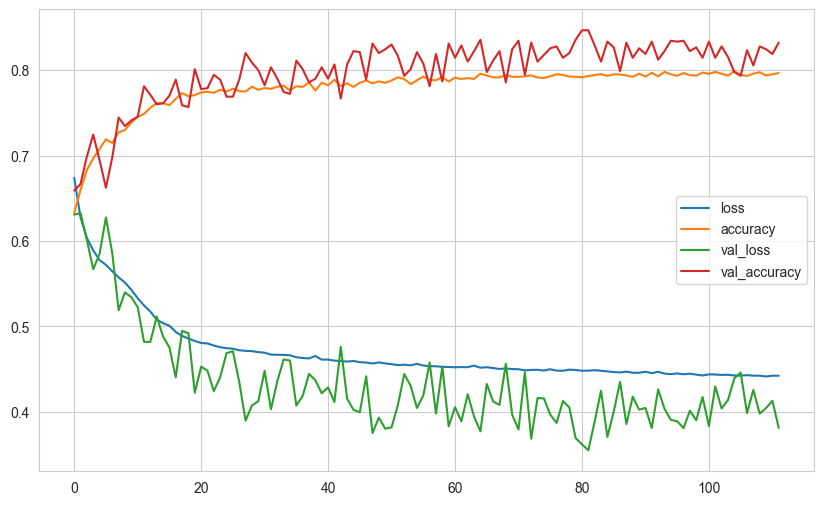

In [474]:
loss_df.plot()

32/32 [==============================] - 0s 422us/step


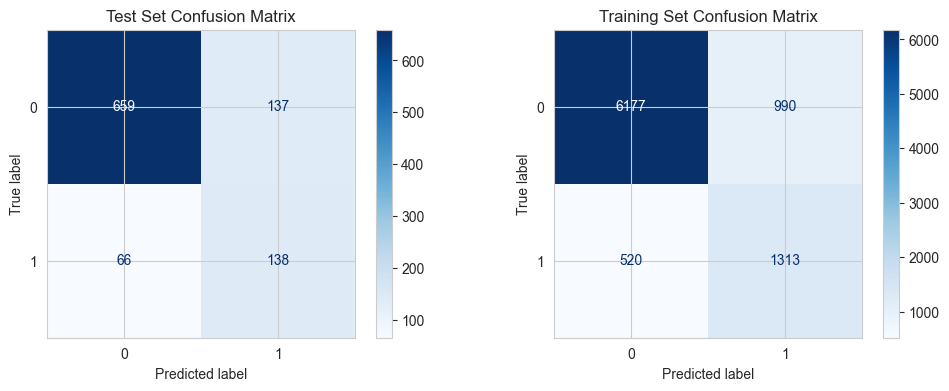


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7167
           1       0.57      0.72      0.63      1833

    accuracy                           0.83      9000
   macro avg       0.75      0.79      0.76      9000
weighted avg       0.85      0.83      0.84      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       796
           1       0.50      0.68      0.58       204

    accuracy                           0.80      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.83      0.80      0.81      1000


-----------------------------precision_recall_curve-----------------------------


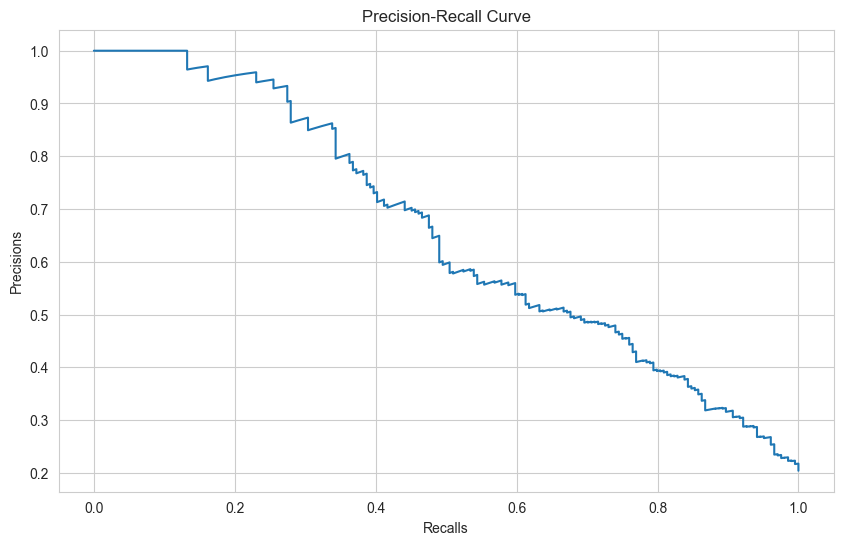

-----------------------------Receiver Operating Characteristic-----------------------------


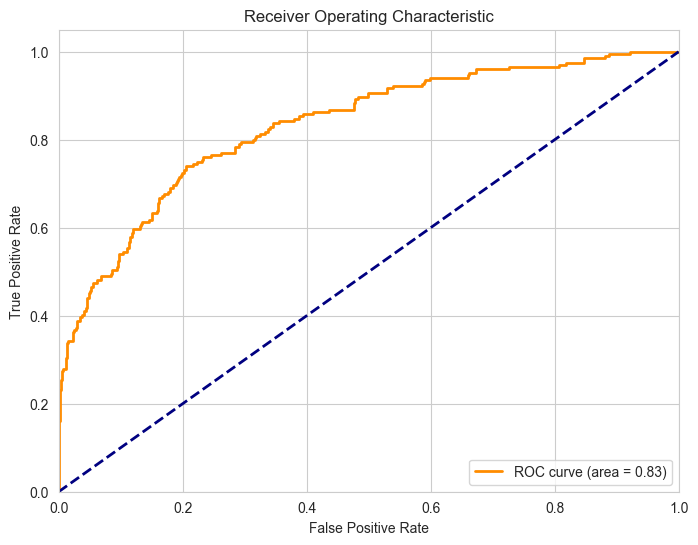

In [475]:
evaluate_classification_model(model5, X_train, y_train, X_test, y_test)


#### Monitor the "val_recall" as metric

In [526]:
model6 = Sequential()
model6.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model6.add(Dense(12, activation = "relu"))
model6.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001) # which is the defult value for the learninig rate 
model6.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])



##### Configure EarlyStopping callback to monitor the validation accuracy during training.
- "val_accuracy" is the monitored metric (we aim to maximize accuracy).
- "mode" is set to "max" since we want to stop training when validation accuracy stops improving.
- "verbose" is set to 1 to receive messages about the early stopping process.
- "patience" is set to 25, which means training continues for up to 25 epochs without improvement.
- "restore_best_weights" is set to True, so the model's best weights are restored when training stops early.


In [527]:

early_stop = EarlyStopping(monitor="val_accuracy", mode="max",verbose=1, patience=25, restore_best_weights = True)


In [528]:
model6.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=1000,  callbacks=[early_stop], class_weight=class_weights)


Epoch 1/1000
127/127 [==============================] - 1s 2ms/step - loss: 0.6673 - accuracy: 0.6132 - val_loss: 0.6424 - val_accuracy: 0.6711
Epoch 2/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.6598 - val_loss: 0.6210 - val_accuracy: 0.6767
Epoch 3/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6591 - val_loss: 0.6032 - val_accuracy: 0.6789
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6758 - val_loss: 0.6153 - val_accuracy: 0.6611
Epoch 5/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.6896 - val_loss: 0.6122 - val_accuracy: 0.6700
Epoch 6/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7044 - val_loss: 0.5281 - val_accuracy: 0.7456
Epoch 7/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7188 - val_loss: 0.5983 - val_accuracy:

In [530]:
loss_df = pd.DataFrame(model6.history.history)
loss_df.head()


loss  accuracy  val_loss  val_accuracy
0 0.667     0.613     0.642         0.671
1 0.632     0.660     0.621         0.677
2 0.611     0.659     0.603         0.679
3 0.597     0.676     0.615         0.661
4 0.582     0.690     0.612         0.670

<Axes: >

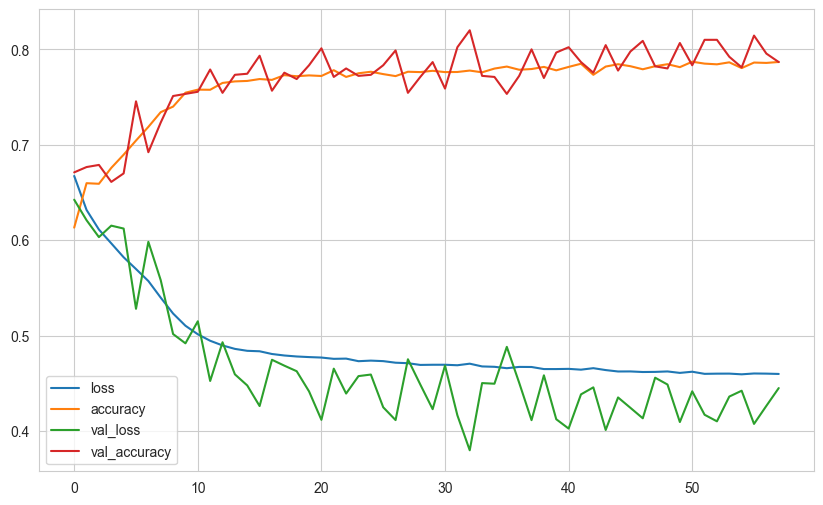

In [531]:
loss_df.plot()

In [532]:
loss, accuracy = model6.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))


Loss is :   0.44212862849235535
Accuracy is 0.7839999794960022


32/32 [==============================] - 0s 421us/step


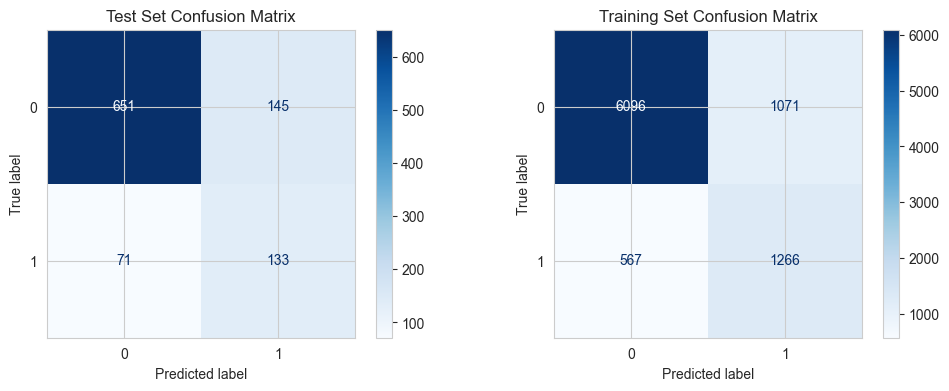


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7167
           1       0.54      0.69      0.61      1833

    accuracy                           0.82      9000
   macro avg       0.73      0.77      0.74      9000
weighted avg       0.84      0.82      0.83      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       796
           1       0.48      0.65      0.55       204

    accuracy                           0.78      1000
   macro avg       0.69      0.73      0.70      1000
weighted avg       0.82      0.78      0.80      1000


-----------------------------precision_recall_curve-----------------------------


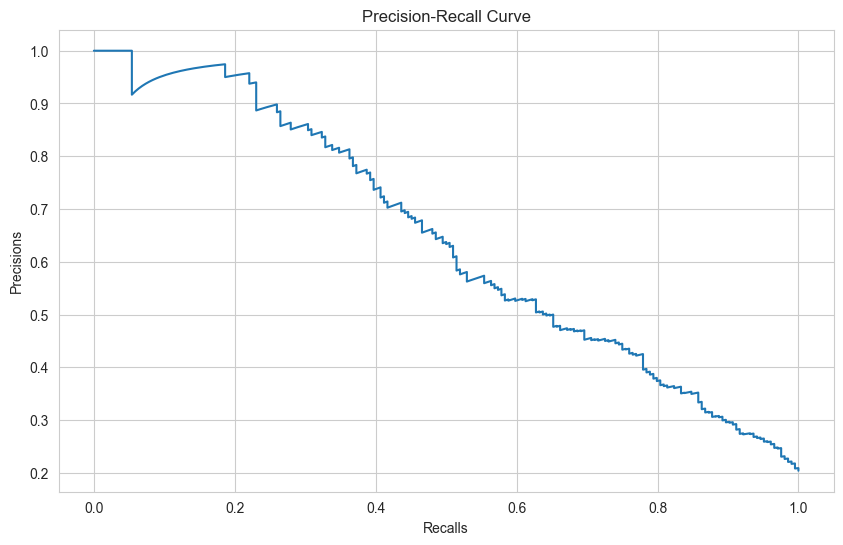

-----------------------------Receiver Operating Characteristic-----------------------------


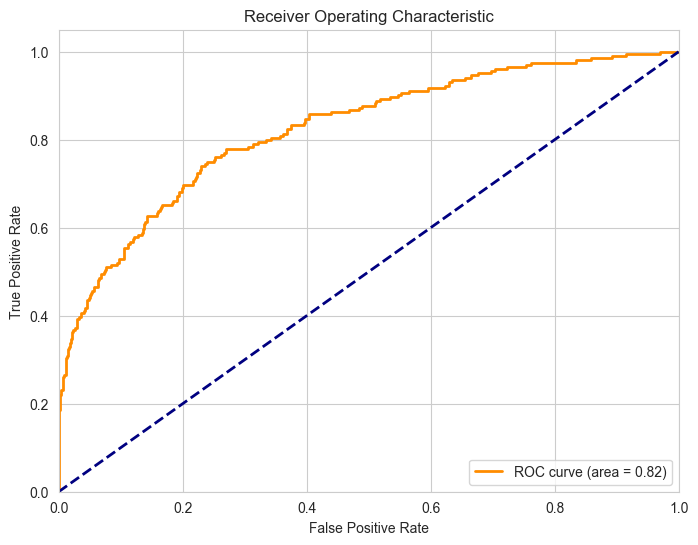

In [533]:
evaluate_classification_model(model6, X_train, y_train, X_test, y_test)


## Optuna

In [487]:
import optuna # Optuna is used for optimizing hyperparameters, and the TensorFlow optimizers will be used during model training.
from tensorflow.keras.optimizers.legacy import Adam, Adadelta, RMSprop, Nadam

##### Function create_model(trial) defines a neural network model with hyperparameters to optimize.
 - Hyperparameters include the number of units in two hidden layers, the choice of optimizer, and learning rate.
 - It also sets random seed for reproducibility.
 - The model architecture consists of two hidden layers, each with dropout for regularization.
 - The model is compiled with the specified optimizer and learning rate.

##### Function objective(trial) is used as the objective function for Optuna's hyperparameter optimization.
 - It creates a model using create_model(trial) and fits it to the training data.
 - Class weights are set based on trial-suggested values for class 0 and class 1.
 - The model is trained for a fixed number of epochs with early stopping.
 - The function returns the accuracy score on the validation data, which Optuna aims to maximize.

In [534]:

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001,0.005)

    tf.random.set_seed(13)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['accuracy'],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=64,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score




In [535]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params
# This code sets up an Optuna study for hyperparameter optimization, runs the optimization process with a specified number of trials,
# and retrieves the best set of hyperparameters based on the objective function's maximization.


[I 2023-10-28 03:57:01,250] A new study created in memory with name: no-name-45c182c4-dd0c-4841-91c4-463a5173c8b1


Restoring model weights from the end of the best epoch: 5.
Epoch 30: early stopping


[I 2023-10-28 03:57:06,527] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 113, 'n_units2': 43, 'optimizer': <class 'keras.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.001650733920686238, 'w0': 2.3145430439503714, 'w1': 0.22628562809608754}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 03:57:10,877] Trial 1 finished with value: 0.6069999933242798 and parameters: {'n_units1': 38, 'n_units2': 93, 'optimizer': <class 'keras.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.001713360150926213, 'w0': 0.019379310933644877, 'w1': 1.9367710631059825}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 03:57:15,350] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 12, 'n_units2': 127, 'optimizer': <class 'keras.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.0015323333873126068, 'w0': 2.9266151003437786, 'w1': 0.07184561911486834}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 37.
Epoch 62: early stopping


[I 2023-10-28 03:57:24,976] Trial 3 finished with value: 0.8550000190734863 and parameters: {'n_units1': 96, 'n_units2': 57, 'optimizer': <class 'keras.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.0019098178026788462, 'w0': 0.25886530580940464, 'w1': 0.0649768853320593}. Best is trial 3 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 03:57:29,510] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 56, 'n_units2': 110, 'optimizer': <class 'keras.optimizers.legacy.rmsprop.RMSprop'>, 'learning_rate': 0.0016970791804372036, 'w0': 3.5298890117571466, 'w1': 0.02425517504763834}. Best is trial 3 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 11.
Epoch 36: early stopping


[I 2023-10-28 03:57:35,093] Trial 5 finished with value: 0.8550000190734863 and parameters: {'n_units1': 66, 'n_units2': 53, 'optimizer': <class 'keras.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.004167541864411317, 'w0': 3.0634497133649337, 'w1': 2.4365297282651515}. Best is trial 3 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 48.
Epoch 73: early stopping


[I 2023-10-28 03:57:44,513] Trial 6 finished with value: 0.8560000061988831 and parameters: {'n_units1': 31, 'n_units2': 37, 'optimizer': <class 'keras.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.001053062916995623, 'w0': 0.21763380884017686, 'w1': 0.11222103627017041}. Best is trial 6 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 16.
Epoch 41: early stopping


[I 2023-10-28 03:57:50,733] Trial 7 finished with value: 0.8009999990463257 and parameters: {'n_units1': 64, 'n_units2': 128, 'optimizer': <class 'keras.optimizers.legacy.adadelta.Adadelta'>, 'learning_rate': 0.0010072188763169709, 'w0': 1.9699274318569326, 'w1': 3.7113889051189966}. Best is trial 6 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 26.
Epoch 51: early stopping


[I 2023-10-28 03:57:58,514] Trial 8 finished with value: 0.8539999723434448 and parameters: {'n_units1': 75, 'n_units2': 86, 'optimizer': <class 'keras.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.002456568877072236, 'w0': 0.21456122854919227, 'w1': 0.03838570462442006}. Best is trial 6 with value: 0.8560000061988831.


Restoring model weights from the end of the best epoch: 13.
Epoch 38: early stopping


[I 2023-10-28 03:58:04,410] Trial 9 finished with value: 0.6079999804496765 and parameters: {'n_units1': 14, 'n_units2': 110, 'optimizer': <class 'keras.optimizers.legacy.nadam.Nadam'>, 'learning_rate': 0.004462768984598915, 'w0': 0.16781826668746874, 'w1': 2.111604153491485}. Best is trial 6 with value: 0.8560000061988831.


{'n_units1': 31,
 'n_units2': 37,
 'optimizer': keras.optimizers.legacy.adam.Adam,
 'learning_rate': 0.001053062916995623,
 'w0': 0.21763380884017686,
 'w1': 0.11222103627017041}

# when we foucs on recall
    {'n_units1': 53,
    'n_units2': 87,
    'optimizer': keras.optimizers.legacy.adadelta.Adadelta,
    'learning_rate': 0.0012305475296829848,
    'w0': 0.04255627050629869,
    'w1': 2.628890627298384}

In [536]:
study.best_params

{'n_units1': 31,
 'n_units2': 37,
 'optimizer': keras.optimizers.legacy.adam.Adam,
 'learning_rate': 0.001053062916995623,
 'w0': 0.21763380884017686,
 'w1': 0.11222103627017041}

In [538]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
# Extract the best hyperparameters obtained from the Optuna study for model construction.
# These parameters include the number of units in the two hidden layers, the chosen optimizer, learning rate, and class weights.

tf.random.set_seed(13)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(unit2, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])



In [540]:
model.fit(X_train,y_train,validation_split=0.1,batch_size=64,epochs=1000,callbacks=[early_stop],verbose=1)

Epoch 1/1000
127/127 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7926 - val_loss: 0.4576 - val_accuracy: 0.8056
Epoch 2/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7959 - val_loss: 0.4509 - val_accuracy: 0.8056
Epoch 3/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7974 - val_loss: 0.4399 - val_accuracy: 0.8044
Epoch 4/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7991 - val_loss: 0.4329 - val_accuracy: 0.8144
Epoch 5/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8048 - val_loss: 0.4249 - val_accuracy: 0.8233
Epoch 6/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8109 - val_loss: 0.4087 - val_accuracy: 0.8289
Epoch 7/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8138 - val_loss: 0.4011 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

### Trying for Recall in the metric 

In [522]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.head()

loss  recall  val_loss  val_recall
0 0.680   0.356     0.671       0.206
1 0.675   0.327     0.665       0.160
2 0.670   0.288     0.660       0.131
3 0.665   0.254     0.656       0.103
4 0.661   0.229     0.651       0.080

<Axes: >

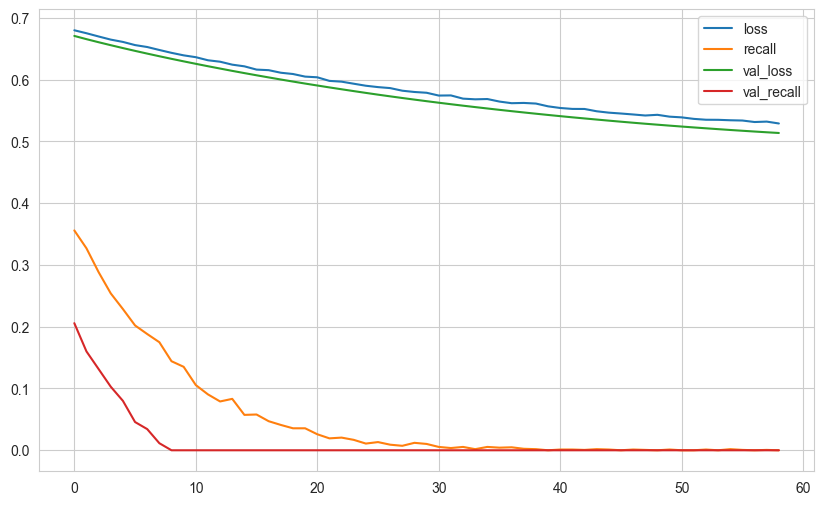

In [523]:
# loss_df.plot()

In [524]:
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print('''
# Loss is :   {}
# Accuracy is {}'''.format(loss, accuracy))


Loss is :   0.6356071829795837
Accuracy is 0.009803921915590763


32/32 [==============================] - 0s 439us/step


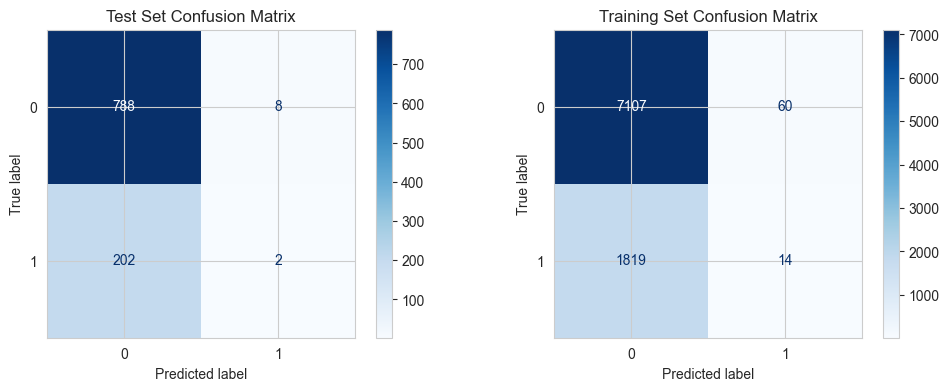


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7167
           1       0.19      0.01      0.01      1833

    accuracy                           0.79      9000
   macro avg       0.49      0.50      0.45      9000
weighted avg       0.67      0.79      0.71      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       796
           1       0.20      0.01      0.02       204

    accuracy                           0.79      1000
   macro avg       0.50      0.50      0.45      1000
weighted avg       0.67      0.79      0.71      1000


-----------------------------precision_recall_curve-----------------------------


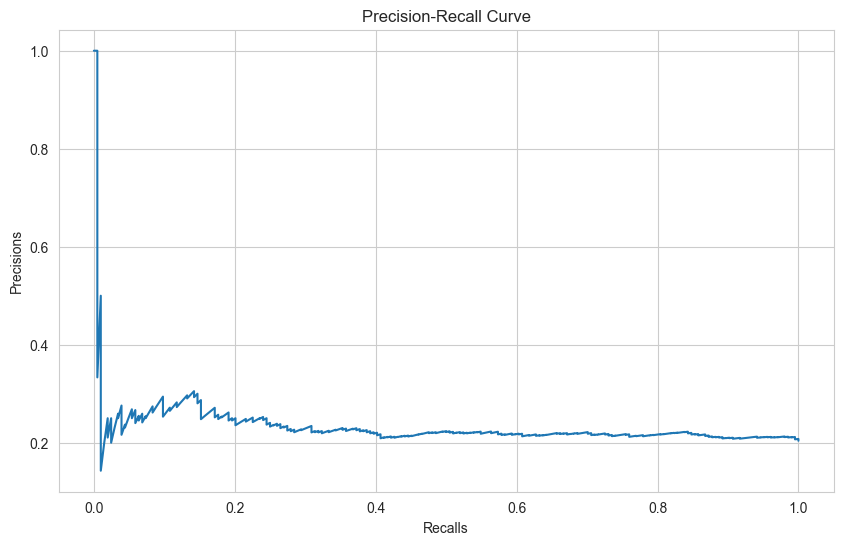

-----------------------------Receiver Operating Characteristic-----------------------------


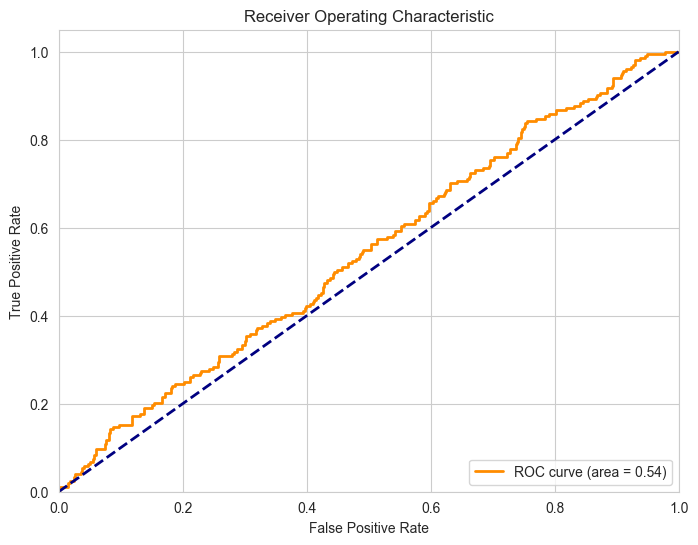

In [525]:
# evaluate_classification_model(model, X_train, y_train, X_test, y_test)


# Using accuracy for Metric

In [541]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()



loss  accuracy  val_loss  val_accuracy
0 0.505     0.793     0.458         0.806
1 0.478     0.796     0.451         0.806
2 0.466     0.797     0.440         0.804
3 0.463     0.799     0.433         0.814
4 0.451     0.805     0.425         0.823

<Axes: >

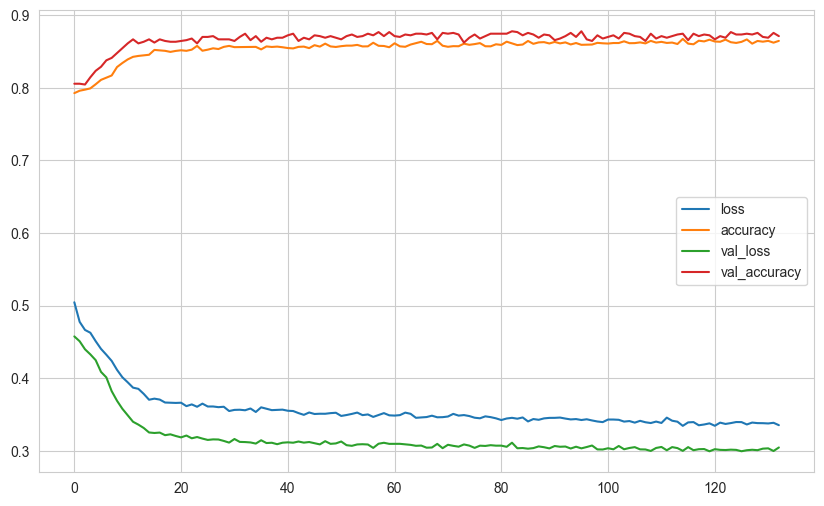

In [542]:
loss_df.plot()

In [543]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('''
Loss is :   {}
Accuracy is {}'''.format(loss, accuracy))


Loss is :   0.3666504919528961
Accuracy is 0.8489999771118164


32/32 [==============================] - 0s 487us/step


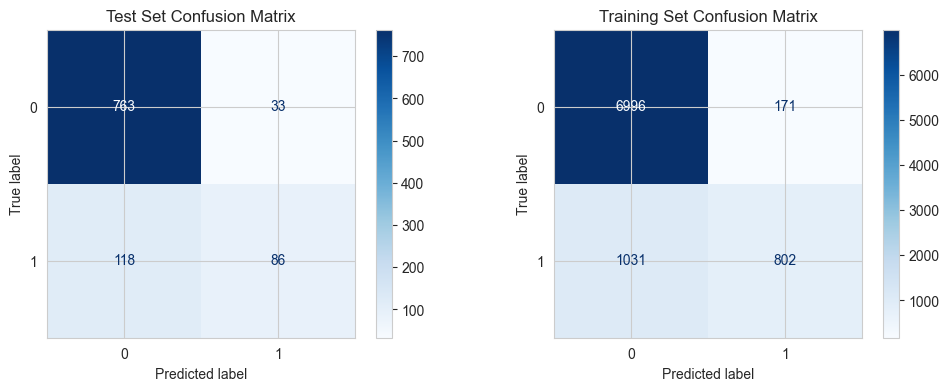


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7167
           1       0.82      0.44      0.57      1833

    accuracy                           0.87      9000
   macro avg       0.85      0.71      0.75      9000
weighted avg       0.86      0.87      0.85      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000


-----------------------------precision_recall_curve-----------------------------


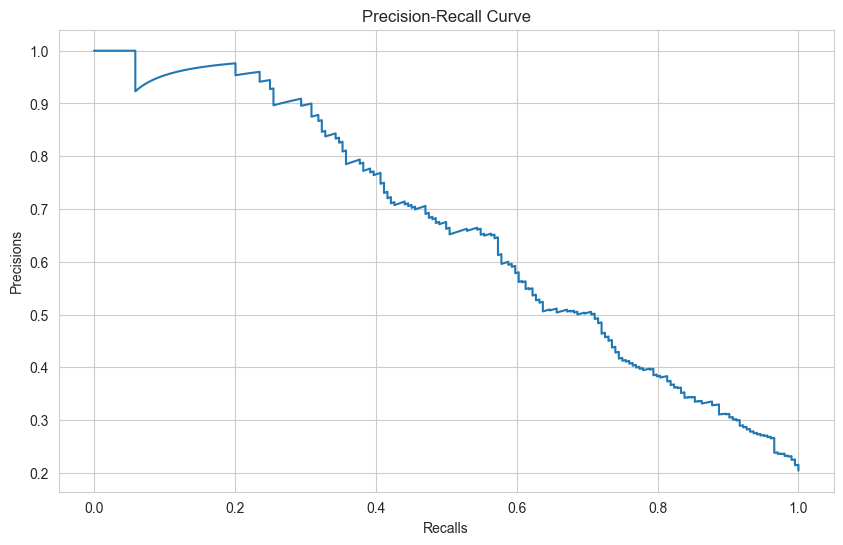

-----------------------------Receiver Operating Characteristic-----------------------------


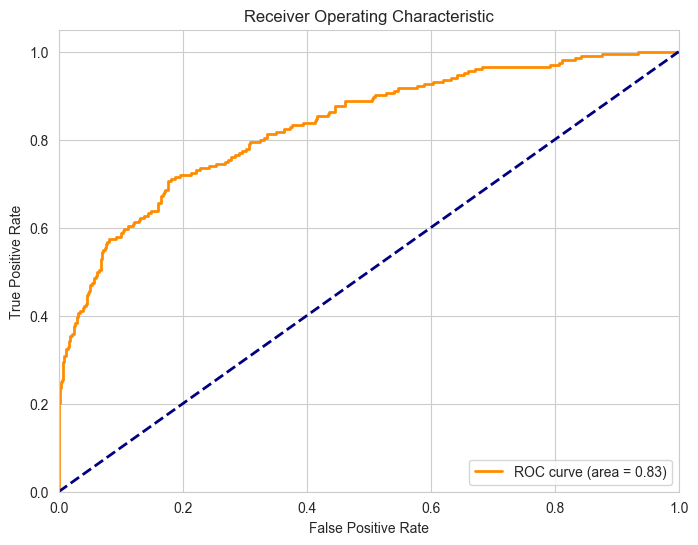

In [544]:
evaluate_classification_model(model, X_train, y_train, X_test, y_test)


# Final Model and Model Deployment and perdiction

In [546]:
import pickle
pickle.dump(Scaler, open("scaler_churn", "wb"))
# Save the data scaler (Scaler) to a file named "scaler_churn" using the Pickle module.
# This allows you to persist the scaler for later use in data preprocessing or transformations.


In [547]:
model.save('model_churn.h5') # Best one 
# Save the trained model to a file named "model_churn.h5" using the model's save method.
# This allows you to persist the model for later use in predictions or further training.



In [580]:
model.input_shape

(None, 12)

In [548]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))
# Load a trained model (model_churn) and a data scaler (scaler_churn) from their respective files.
# The model is loaded using Keras' load_model function, and the scaler is loaded using Pickle.
# This prepares the model and scaler for making predictions or further data preprocessing.


In [577]:
churn = df.drop('Exited', axis = 1).iloc[13:14, :]
churn

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
13          549       0   25       5        0              2          0   

    IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
13               0           190857                 1                  0   

    Geography_Spain  
13                0

In [554]:
churn = scaler_churn.transform(churn) 
churn

array([[0.398     , 0.        , 0.09459459, 0.5       , 0.        ,
        0.33333333, 0.        , 0.        , 0.95432066, 1.        ,
        0.        , 0.        ]])

In [555]:
(model_churn.predict(churn) > 0.5).astype("int32")


1/1 [==============================] - 0s 24ms/step


array([[0]], dtype=int32)

In [560]:
df["Exited"].iloc[13:14]

13    0
Name: Exited, dtype: int64

## trying 

In [561]:
from sklearn.linear_model import LogisticRegression

In [569]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_train_pred=log_model.predict(X_train)

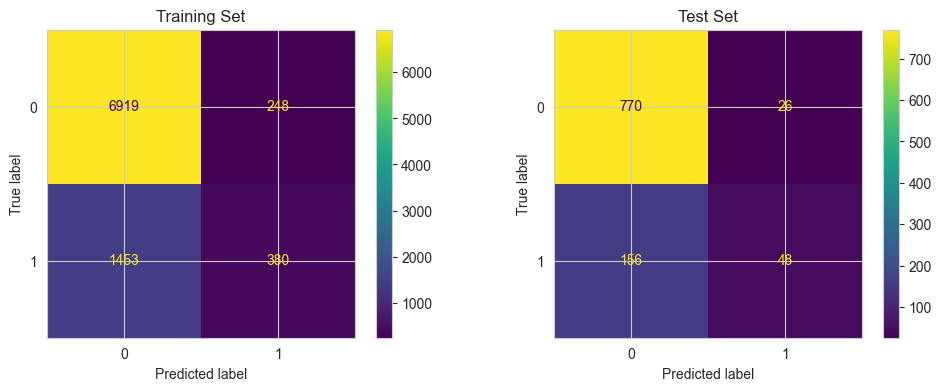


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      7167
           1       0.61      0.21      0.31      1833

    accuracy                           0.81      9000
   macro avg       0.72      0.59      0.60      9000
weighted avg       0.78      0.81      0.77      9000

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       796
           1       0.65      0.24      0.35       204

    accuracy                           0.82      1000
   macro avg       0.74      0.60      0.62      1000
weighted avg       0.79      0.82      0.78      1000



In [570]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(log_model, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}''')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___